<a href="https://colab.research.google.com/github/Juapatral/encuestas-stack-overflow/blob/master/trabajo_final_sbdm_20191.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <center> Trabajo final Sistema de Bases de Datos Masivos </center>
---


    
### <center> Posgrado de Analítica, 2019-1 </center>

###  <center> Integrantes </center>

<center> 
Jhon Anderson Londoño Herrera <br>  
Juan Pablo Trujillo Alviz 
</center>

#### <center> 22 de junio de 2019 </center>
---

## Indice

---

1. [Motivación](#motivación)

 * 1.1. [Licenciamiento](#licenciamiento)

2. [Metodología](#metodología)

3. [Desarrollo](#desarrollo)

 * 3.1. [Códigos generales](#códigos-generales)

 * 3.2. [Establecer conexión](#establecer-conexión)

 * 3.3. [Limpieza de tablas](#limpieza-de-las-tablas)

 * 3.4. [SQL](#sql)
 
 * 3.5. [Representación visual de la bodega](#representacion-visual-de-la-bodega-de-datos)
 
 * 3.6. [MapReduce](#mapreduce)
 
 * 3.7. [Pronóstico 2018](#pronóstico-2018)
 
 * 3.8. [Actualización de la bodega de datos](#actualizacion-de-la-bodega)
 
 * 3.9. [Modificación de la bodega de datos](#modificación-de-la-bodega-de-datos)

4. [URL's de interés](#urls-de-interes)

## Motivación
---


Este es el trabajo final del módulo Sistemas de Bases de Datos Masivos del posgrado de Analítica de la Universidad Nacional de Colombia, Sede Medellín. La guía del módulo puede ser consultado en esta [página web](https://sebastian-gomez.com/bigdata/) creada por el profesor MsC. Sebastián Gómez. El trabajo final, sus preguntas y lineamientos pueden ser consultados [aquí](https://drive.google.com/file/d/18uzP5uGg7OhbEDQIECtT8XtA4jr3NTf9/view).

Analizar tendencias dentro del mundo de la tecnología se ha convertido en uno de los más grandes retos de la industria, prever cuál será el siguiente y más éxitoso lenguaje de programación o cuál sería el salario ideal para un desarrollador por tecnología se convertirá en una tarea crítica durante los próximos años. Stack Overflow es un sitio web ampliamente utilizado por la comunidad de desarrolladores de software, en la cual otros desarrolladores pueden encontrar soluciones a problemas de programación en diferentes lenguajes. Este sitio realiza desde el 2011 una encuesta a sus usuarios para observar y analizar tendencias en la industria de la tecnología y el software: https://insights.stackoverflow.com/survey/2019. La más reciente fue durante el mismo 2019. 

Las encuestas han sido cuidadosamente almacenadas y expuestas en directorios de datos abiertos. Para este análisis se utilizarán 7 conjuntos de datos masivos completamente libres y accesibles a través de BigQuery que son las encuestas de los años **2011 a 2017**.

Las encuestas pueden ser consultadas a través de Google Cloud BigQuery o están disponibles de manera gratuita en [este enlace](https://insights.stackoverflow.com/survey). (Importante revisar el licenciamiento de las bases de datos antes de trabajar con ellas)

#### Licenciamiento

Todas las encuestas desde el 2011 al 2019 están disponibles [aquí](https://insights.stackoverflow.com/survey).


Estas bases de datos son publicables a través de la Licencia de Bases de Datos Abiertas (ODbL por sus siglas en inglés) y los términos y condiciones pueden ser consultados [aquí](http://opendatacommons.org/licenses/odbl/1.0/), mientras que todos los derechos individuales sobre el contenido de la base de datos están licenciados a través de la Licencia de Contenido de Bases de Datos (DbCL por sus siglas en inglés) y los términos y condiciones pueden ser consultados [aquí](http://opendatacommons.org/licenses/dbcl/1.0/).

Este tipo de licenciamiento da derecho a compartir, adaptar y crear trabajos derivados de las encuestas mientras se le atribuya toda la fuente a Stack Overflow, se mantenga abierta la base de datos resultante y continúe con el licenciamiento ODbL.

<br>

**Agradecimientos**

La fuente primaria de las bases de datos consultadas es Stack Overflow y contiene información sobre las encuestas realizadas por esta organización. La base de datos resultante, que en este documento se llama "encuestas", así como todos los resultados obtenidos de ella, están disponible gracias a la Licencia de Bases de Datos Abiertas ([ODbL](https://opendatacommons.org/licenses/odbl/1.0/) ).


## Metodología
---


**Instalar paquetes necesarios**


---

Se propone utilizar una conexión directa a Google BigQuery a través de una API privada, generando las credenciales de acceso. Para ello se utiliza el paquete de python *google-cloud-bigquery* el cual se puede instalar ejecutando el comando en la terminal:

```
pip install google-cloud.bigquery
```
En caso de que se tenga instalado *Anaconda Navigator*, se recomienda instalar el paquete con el siguiente comando dentro de la terminal de Anaconda:

```
conda install -c conda-forge google-cloud-bigquery
```


**Establecer conexión desde equipo local**

---

Una vez se instale el paquete necesario, se puede realizar la conexión ejecutando los siguientes códigos en python:

```
from google.cloud import bigquery
from google.oauth2 import service_account

# cargar el archivo de credenciales descargado 
credenciales = service_account.Credentials.from_service_account_file(.../filepath/filename.json)

# identificar el nombre del proyecto
id_proyecto = 'nombre_del_proyecto'

# realizar la conexion
cliente = bigquery.Client(credentials = credenciales, project = id_proyecto)

```

**Establecer conexión desde Google Colab**

---

En caso que esté ejecutando los comandos en Google Colab, es necesario realizar la carga del archivo a Google Drive y se llama de la siguiente forma.

```
# subir el archivo de credenciales a su google drive
# para mas informacion ir a la seccion de anexos dentro de metodologia

# importar la libreria google.colab
from google.colab import drive

# habilitar el uso de tu drive y abrir el vínculo que sale como resultado
drive.mount('/content/gdrive') # ingrese la contraseña generada

# cambiar el directorio
cd gdrive/'My drive'/

# cargar el archivo de credenciales desde Drive
credenciales = service_account.Credentials.from_service_account_file('filename.json')

```

**Ejecutar queries**

---
Una vez la conexión sea exitosa, se pueden ejecutar las rutinas de SQL de la siguiente forma:

```
# se escribe el query como texto crudo
query = '''
SELECT *
FROM `dataset.table`
'''

# se ejecuta el query
consulta = cliente.query(query)

# se traen los resultados como un objeto Rowiterator
resultado = consulta.result()

# si se quiere visualizar los resultados como un dataframe de pandas
import pandas as pd

tabla = resultado.to_dataframe()
tabla.head()

```

**Anexos**

---

* Para más información sobre el paquete *google-cloud-bigquery*, [dar click aquí](https://googleapis.github.io/google-cloud-python/latest/index.html).

* Para más información sobre cómo realizar la conexión con Google BigQuery, [dar click aquí](https://www.blendo.co/blog/access-data-google-bigquery-python-r/).

* Para más información sobre cómo generar las credenciales de acceso, [dar click aquí](https://stackoverflow.com/questions/43004904/accessing-gae-log-files-using-google-cloud-logging-python).

* Para más información sobre cómo cargar archivos a Google Colab, [dar click aquí](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveA).

## Desarrollo
---


### Códigos generales

In [0]:
# cargar paquetes
from google.cloud import bigquery # realizar conexion con google bigquery
from google.oauth2 import service_account # realizar conexiones con las apis de google
from google.colab import drive # utilizar archivos del drive personal
import numpy as np # funciones generales de limpieza
import pandas as pd # tablas 
import matplotlib.pyplot as plt # graficas
from matplotlib.transforms import Bbox # para ajustar tamaño
import re # manejo de expresiones regulares
from IPython.display import Image, display # para visualizar imagenes en el cuaderno
from itertools import chain # para deslistar listas
import collections #alternativas para contenedores de python
import math # calculos matematicos o aritmeticos
import json # para trabajar con diccionarios y formato json

In [3]:
# montar drive propio
drive.mount('/content/gdrive') # si se tiene varias cuentas activas, siempre pedira reactivacion

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
# establecer ruta para cargar el archivo
cd gdrive/'My Drive'

/content/gdrive/My Drive


In [0]:
### FUNCIONES Propias


## busqueda_encabezados(dataframe, patron)

def busqueda_encabezados(dataframe, patron):
  
  """busqueda_encabezados(dataframe, patron)

    dataframe   (pandas.Dataframe)  dataframe sobre el que se quiere realizar la busqueda
    patron      (str)               cadena de texto o expresion regular a buscar

    Esta funcion itera sobre las columnas de un dataframe y 
    busca el patron que el usuario defina
    
  """
  encabezados = [] # se crea una lista vacia
  lista = list(dataframe.columns) # lee las columnas de dataframe
  
  # se crea el iterador
  for elemento in lista: 
  # se comprueba si el patron esta o no en el elemento
    if(re.search(patron,elemento) != None):
      # en caso de que este, se anade a la lista
      encabezados.append(elemento)
    
  # se devuelven los resultados    
  return encabezados



## reemplazar_none

def reemplazar_none(lista, reemplazo = ''):
  
  """ reemplazar_none(lista, reemplazo = '')

      lista     (itr)  elemento iterable de texto sobre el que se reemplazar none
      reemplazo (str)  Defecto '' (vacio) reemplazo que se quiera hacer del none

      Esta funcion itera sobre los elementos de lista y reemplaza el none o nulos por reemplazo
  """
  
  # vector de elementos a corregir
  corregir = [None, 'NA', 'None']
  # se crea el iterador
  for i,x in enumerate(lista):
    
    # se reemplaza None por reemplazo
    if x in corregir:
      lista[i] = reemplazo
      
    # se reemplazan los Nan (float)
    elif type(x) is float:
      if np.isnan(x):
        lista[i] = reemplazo

  # se devuelven los resultados
  return lista


## limpiar_lenguajes


def limpiar_lenguajes(lista):
  
  """limpiar_lenguajes(lista)

  lista    (itr)  elemento iterable de texto sobre el que se realiza la limpieza

  Esta funcion itera sobre los elementos de lista
  uniendo con punto y coma todos los elementos
  y eliminando los punto y comas seguidos,
  del principio y del final

  Ademas, elimina el separador de coma y lo reemplaza por punto y coma
  """
  
  list(lista) # convierte a lista en una lista
  string = ';'.join(lista) # unifica la lista en string con punto y coma
  string = re.sub(';{2,}', ';', string) # reemplaza todos los punto y coma seguidos
  string = re.sub('^;|;$', '', string) # reemplaza punto y coma al principio o al final
  string = string.replace(', ', ';') # reemplaza las comas por punto y coma
  string = string.replace(',', ';') # reemplaza las comas por punto y coma
  string = string.replace('; ', ';')
  return string # retorna el string
  
  
  
## unificar_lenguajes(dataframe)

def unificar_lenguajes(dataframe):
  
  """ unificar_lenguajes(dataframe)

  dataframe    (pandas.dataframe)  dataframe al que se van a unificar los lenguajes de programacion

  Esta funcion identifica las columnas seleccionadas para los lenguajes de programacion
  y las unifica con un separador de punto y coma eliminando las columnas utilizadas
  """
  
  encabezados = busqueda_encabezados(dataframe,'^programming_*') # identifica los encabezados
  df = dataframe[encabezados] # filtra el dataframe
  df = df.apply(reemplazar_none) # limpia los none o nulos
  dataframe['programming_language'] = df.apply(limpiar_lenguajes, axis = 1) # crea la nueva columna de lenguajes de programacion
  dataframe = dataframe.drop(columns = encabezados) # elimina las columnas no necesarias
  return dataframe # devuelve el dataframe


def verificar_lista(string,lista):
  
  """verificar_lista(string,lista)

    string    (str)  cadena de texto para el message box
    lista     (list) lista en la que se quiere verificar si el input existe o no

    Esta funcion permite ingresar al usuario un dato y validar si pertenece o no a una lista predefinida
    """
  
  # ingresar dato
  dato = input('Ingrese ' + string + ' (Escriba "Cancelar" para cancelar): ')
  
  # verificar dato
  if dato not in lista:
    if dato == 'Cancelar':
      return None
    else:
      dato = verificar_lista((string + ' válido').replace(' válido válido',' válido'),lista)
    
  # retornar resultados
  return dato

### Establecer conexión

In [0]:
## SE ESTABLECE LA CONEXION

# ejecutar las credenciales
credenciales = service_account.Credentials.from_service_account_file(r'bases-de-datos-clase2-20190601-9d3f46d1c833.json')

# establecer nombre del proyecto
id_proyecto = 'bases-de-datos-clase2-20190601'

# iniciar el cliente
cliente = bigquery.Client(credentials = credenciales, project = id_proyecto)

```
# EJEMPLO

# NOT RUN

# se establecen todos los queries generales a ejecutar para visualizar las tablas

queries = ['\nSELECT *\nFROM `fh-bigquery.stackoverflow.survey_results_' + str(i) +'`' + '\nLIMIT 100' for i in range(2011,2017)]
queries.append('\nSELECT *\nFROM `fh-bigquery.stackoverflow.survey_results_public_2017`\nLIMIT 100')

[print(query) for query in queries]

# se ejecuta el query
consulta = cliente.query(queries[0])

# se traen los resultados como un objeto Rowiterator
resultado = consulta.result()

# si se quiere visualizar los resultados como un dataframe de pandas
encuesta_2011 = resultado.to_dataframe()
encuesta_2011.head()

# END NOT RUN
```

In [0]:
# se establecen los nuevos queries que contengan datos comunes entre las encuestas
queries_comunes = []

queries_comunes.append( '''SELECT string_field_0 AS country,string_field_3 AS years_programming,string_field_4 AS occupation,string_field_45 AS salary,string_field_30 AS programming_language_technology1,string_field_31 AS programming_language_technology2,string_field_32 AS programming_language_technology3,string_field_33 AS programming_language_technology4,string_field_34 AS programming_language_technology5,string_field_35 AS programming_language_technology6,string_field_36 AS programming_language_technology7,string_field_37 AS programming_language_technology8,string_field_38 AS programming_language_technology9,string_field_39 AS programming_language_technology10,string_field_40 AS programming_language_technology11,string_field_41 AS programming_language_technology12,string_field_42 AS programming_language_technology13
FROM `fh-bigquery.stackoverflow.survey_results_2011`
'''
                      )

queries_comunes.append( '''SELECT string_field_0 AS country,string_field_3 AS years_programming,string_field_4 AS occupation,string_field_39 AS salary,string_field_22 AS programming_language_technology1,string_field_23 AS programming_language_technology2,string_field_24 AS programming_language_technology3,string_field_25 AS programming_language_technology4,string_field_26 AS programming_language_technology5,string_field_27 AS programming_language_technology6,string_field_28 AS programming_language_technology7,string_field_29 AS programming_language_technology8,string_field_30 AS programming_language_technology9,string_field_31 AS programming_language_technology10,string_field_32 AS programming_language_technology11,string_field_33 AS programming_language_technology12,string_field_34 AS programming_language_technology13,string_field_35 AS programming_language_technology14,string_field_36 AS programming_language_technology15
FROM `fh-bigquery.stackoverflow.survey_results_2012`
'''
                      )

queries_comunes.append( '''SELECT string_field_0 AS country,string_field_3 AS years_programming,string_field_4 AS occupation,string_field_100 AS salary,string_field_56 AS programming_language_technology1,string_field_57 AS programming_language_technology2,string_field_58 AS programming_language_technology3,string_field_59 AS programming_language_technology4,string_field_60 AS programming_language_technology5,string_field_61 AS programming_language_technology6,string_field_62 AS programming_language_technology7,string_field_63 AS programming_language_technology8,string_field_64 AS programming_language_technology9,string_field_65 AS programming_language_technology10,string_field_66 AS programming_language_technology11,string_field_67 AS programming_language_technology12,string_field_68 AS programming_language_technology13,string_field_69 AS programming_language_technology14
FROM `fh-bigquery.stackoverflow.survey_results_2013`
'''
                      )

queries_comunes.append( '''SELECT string_field_0 AS country,string_field_5 AS years_programming,string_field_6 AS occupation,string_field_7 AS salary,string_field_42 AS programming_language_technology1,string_field_43 AS programming_language_technology2,string_field_44 AS programming_language_technology3,string_field_45 AS programming_language_technology4,string_field_46 AS programming_language_technology5,string_field_47 AS programming_language_technology6,string_field_48 AS programming_language_technology7,string_field_49 AS programming_language_technology8,string_field_50 AS programming_language_technology9,string_field_51 AS programming_language_technology10,string_field_52 AS programming_language_technology11,string_field_53 AS programming_language_technology12
FROM `fh-bigquery.stackoverflow.survey_results_2014`
'''
                      )

queries_comunes.append( '''SELECT string_field_0 AS country,string_field_4 AS years_programming,string_field_5 AS occupation,string_field_105 AS salary,string_field_8 AS programming_language_technology1,string_field_9 AS programming_language_technology2,string_field_10 AS programming_language_technology3,string_field_11 AS programming_language_technology4,string_field_12 AS programming_language_technology5,string_field_13 AS programming_language_technology6,string_field_14 AS programming_language_technology7,string_field_15 AS programming_language_technology8,string_field_16 AS programming_language_technology9,string_field_17 AS programming_language_technology10,string_field_18 AS programming_language_technology11,string_field_19 AS programming_language_technology12,string_field_20 AS programming_language_technology13,string_field_21 AS programming_language_technology14,string_field_22 AS programming_language_technology15,string_field_23 AS programming_language_technology16,string_field_24 AS programming_language_technology17,string_field_25 AS programming_language_technology18,string_field_26 AS programming_language_technology19,string_field_27 AS programming_language_technology20,string_field_28 AS programming_language_technology21,string_field_29 AS programming_language_technology22,string_field_30 AS programming_language_technology23,string_field_31 AS programming_language_technology24,string_field_32 AS programming_language_technology25,string_field_33 AS programming_language_technology26,string_field_34 AS programming_language_technology27,string_field_35 AS programming_language_technology28,string_field_36 AS programming_language_technology29,string_field_37 AS programming_language_technology30,string_field_38 AS programming_language_technology31,string_field_39 AS programming_language_technology32,string_field_40 AS programming_language_technology33,string_field_41 AS programming_language_technology34,string_field_42 AS programming_language_technology35,string_field_43 AS programming_language_technology36,string_field_44 AS programming_language_technology37,string_field_45 AS programming_language_technology38,string_field_46 AS programming_language_technology39,string_field_47 AS programming_language_technology40,string_field_48 AS programming_language_technology41,string_field_49 AS programming_language_technology42,string_field_50 AS programming_language_technology43
FROM `fh-bigquery.stackoverflow.survey_results_2015`
'''
                      )

queries_comunes.append( '''SELECT country AS country,experience_range AS years_programming,occupation AS occupation,salary_range AS salary,tech_do AS programming_language_technology1,dev_environment AS programming_language_technology2
FROM `fh-bigquery.stackoverflow.survey_results_2016`
'''
                      )

queries_comunes.append( '''SELECT Country AS country,YearsProgram AS years_programming,Professional AS occupation,Salary AS salary,HaveWorkedLanguage AS programming_language_technology1,HaveWorkedFramework AS programming_language_technology2,HaveWorkedDatabase AS programming_language_technology3,HaveWorkedPlatform AS programming_language_technology4,IDE AS programming_language_technology5
FROM `fh-bigquery.stackoverflow.survey_results_public_2017`
'''
                      )

In [0]:
[print(query) for query in queries_comunes]

SELECT string_field_0 AS country,string_field_3 AS years_programming,string_field_4 AS occupation,string_field_45 AS salary,string_field_30 AS programming_language_technology1,string_field_31 AS programming_language_technology2,string_field_32 AS programming_language_technology3,string_field_33 AS programming_language_technology4,string_field_34 AS programming_language_technology5,string_field_35 AS programming_language_technology6,string_field_36 AS programming_language_technology7,string_field_37 AS programming_language_technology8,string_field_38 AS programming_language_technology9,string_field_39 AS programming_language_technology10,string_field_40 AS programming_language_technology11,string_field_41 AS programming_language_technology12,string_field_42 AS programming_language_technology13
FROM `fh-bigquery.stackoverflow.survey_results_2011`

SELECT string_field_0 AS country,string_field_3 AS years_programming,string_field_4 AS occupation,string_field_39 AS salary,string_field_22 AS

[None, None, None, None, None, None, None]

### Limpieza de las tablas
---

Haga una limpieza de los datos identificando los campos comunes entre los conjuntos de datos. (Adjuntar Rutina SQL o Python)

In [0]:
# crear lista para leer las encuestas
lista_encuestas = ['encuesta_' + str(i) for i in range(2011,2018)]
lista_encuestas

['encuesta_2011',
 'encuesta_2012',
 'encuesta_2013',
 'encuesta_2014',
 'encuesta_2015',
 'encuesta_2016',
 'encuesta_2017']

In [0]:
## INICIO LECTURA

for i, encuesta in enumerate(lista_encuestas):
  
  consulta = cliente.query(queries_comunes[i]) # hacer consulta
  resultado = consulta.result() # traer resultados
  lista_encuestas[i] = resultado.to_dataframe() # convertir a dataframe

## FIN LECTURA

In [0]:
## INICIO LIMPIEZA DE LENGUAJES

filas = [2,2,1,2,0,0,0]

for i, encuesta in enumerate(lista_encuestas):
  
    encuesta2 = unificar_lenguajes(encuesta)
    lista_encuestas[i] = encuesta2[filas[i]:]
    
## FIN LIMPIEZA DE LENGUAJES

In [0]:
# unificar encuestas en un solo dataframe

encuestas = pd.concat(lista_encuestas, 
                      keys = list(range(2011,2018)),
                      sort = False,
                     )

# eliminar otros datos
encuestas = encuestas[encuestas['salary'] != 'Response']

In [0]:
# organizar dataframe con columna de encuestas
encuestas = encuestas.reset_index(level = 0) # agrega el anio como columna
encuestas = encuestas.rename(columns = {'level_0':'survey'}) # modifica el nombre de la columna a survey
encuestas = encuestas.reset_index(drop = True) # reinicia los indices sin agregarlos como columnas

In [0]:
encuestas.head(10)

,survey,country,years_programming,occupation,salary,programming_language
0,2011,Germany,None,None,None,
1,2011,United States of America,11,Web Services,None,
2,2011,Other Europe,41310,Education,None,
3,2011,Australia,<2,Other,None,
4,2011,United Kingdom,41310,Software Products,None,
5,2011,Africa,None,None,None,
6,2011,Other Europe,41310,Other,None,
7,2011,United Kingdom,None,None,None,
8,2011,United States of America,None,None,None,
9,2011,Other Europe,41310,Software Products,None,


In [0]:
# limpiar filas innecesarias
filter = encuestas['years_programming'].str.contains('^Years|^Response', na = False, regex = True)
encuestas = encuestas[~filter]

In [0]:
# limpiar lenguajes 2
lenguajes = ['Javascript', 'C#', 'Java', 'Notepad++', 'Sql', 'Android', 'Angularjs', 'C', 'C++', 'Php',
             'Sql Server', 'Atom', 'Python', 'Sublime', 'Node.Js', 'Vim', 'Windows Desktop', 'Mongodb',
             'Mysql', 'Azure', 'Gae', 'Sublime Text', 'Visual Studio', 'Ios', 'Objective-C', 'Jquery',
             'Css', 'Ruby', 'Arduino / Raspberry Pi', 'Linux Desktop', 'Emacs', 'Redis', '.Net Core',
             'Wordpress', 'Eclipse', 'Android Studio', 'Html5', 'Lamp', 'Coffeescript', 'Perl',
             'Amazon Web Services', 'Assembly', 'C++11', 'Postgresql', 'Visual Basic', 'Intellij',
             'Go', 'Cassandra', 'Hadoop', 'Matlab', 'R', 'Cordova', 'Mac Os', 'Sqlite', 'Oracle',
             'Windows Phone', 'React', 'Scala', 'Swift', 'Xcode', 'Groovy', 'Haskell', 'Phpstorm',
             'Xamarin', 'Clojure', 'Sharepoint', 'Netbeans']

patron = '^ |\\(.*\\)|.*[Ff]uck.*| $'

prueba = encuestas['programming_language']
prueba2 = [re.sub(patron,'',a).replace('; ',';') for a in prueba]
prueba3 = [a.split(';') for a in prueba2]

for j,a in enumerate(prueba3):
  
  if type(a) is list:
    
    for i,lan in enumerate(a):
      
      lan = lan.upper().title()
      lan = re.sub(patron,'',lan)
      
      if lan == '':
        a[i] = 'No language'
        
      elif lan not in lenguajes:
        a[i] = 'Other'
      
      else:
        a[i] = lan
  
  else:
    a = a.upper().title()
    a = re.sub(patron,'',a)
  
    if a == '':
      prueba3[j] = 'No language'

    elif a == ['']:
      prueba3[j] = 'No language'

    elif a not in lenguajes:
      prueba3[j] == 'Other'
      
    else:
      prueba3[j] = a
      
prueba3 = [';'.join(a) for a in prueba3]
encuestas['programming_language'] = prueba3

In [0]:
# Limpiar experiencia

lista = list(encuestas['years_programming'])

lista1 = reemplazar_none(lista, reemplazo = 'Rather not say')

for i,fecha in enumerate(lista1):
    
  if ((fecha == "41310") or (fecha == "40944") or (fecha == "2/5/2013") or (fecha=="2/5/2014") or (fecha == "2 - 5 years" ) or (fecha=="5 to 6 years")
       or (fecha == "2 to 3 years") or (fecha=="3 to 4 years") or (fecha=="4 to 5 years")):
      
    lista1[i] = "2 to 5 years"
      
  elif ((fecha == "<2") or (fecha == "1 to 2 years") or (fecha == "1 - 2 years")
         or (fecha == "Less than 1 year") or (fecha == "Less than a year")):
      
    lista1[i] = "Less than 2 years"
      
  elif ((fecha == "41435") or (fecha == "41070") or (fecha == "6/10/2013") or (fecha == "6/10/2014") or (fecha == "2 - 5 years" )
         or (fecha == "6 - 10 years") or (fecha=="6 to 7 years") or (fecha=="7 to 8 years")
         or(fecha =="8 to 9 years ") or (fecha == "9 to 10 years") or (fecha == "10 to 11 years")):
      
    lista1[i] = "6 to 10 years"
  
  elif fecha == 'Rather not say':
    lista1[i] = fecha
  
  else:
    lista1[i] = "11 or more years"
  

encuestas['years_programming'] = lista1


In [0]:
# limpiar salario
lista = list(encuestas['salary'])

# limpiar nulos por 0
lista3 = reemplazar_none(lista, reemplazo = 'Rather not say')

# se crea un iterador para clasificar por intervalos
for i,a in enumerate(lista3):
  
  # se evalua si el salario es un float
  try:
    a = float(a)
    
    if a == 0.0:
      lista3[i] = '0'
      
    elif a < 20000:
      lista3[i] = '120K - 140K'

    elif a < 40000:
      lista3[i] = '20K - 40K'

    elif a < 60000:
      lista3[i] = '40K - 60K'

    elif a < 80000:
      lista3[i] = '60K - 80K'
      
    elif a < 100000:
      lista3[i] = '80K - 100K'
      
    elif a < 120000:
      lista3[i] = '100K - 120K'
      
    elif a < 140000:
      lista3[i] = '120K - 140K'
      
    else:
      lista3[i] = 'More than 140K'

  # en caso de no ser float, se identifican los casos y se reemplaza
  except:   
    if type(a) is not float:
    
      if (a in ['Compensation', 'Other (please specify)', 'Rather not say', 
                'Student / Unemployed', 'Unemployed', '0', 'Response']):
        lista3[i] = 'Rather not say'

      elif a in ['Less than $10,000', 'Less than $20,000', '$10,000 - $20,000', '<$20,000']:
        lista3[i] = 'Less than 20K'

      elif (a in ['More than $160,000', 'More than $200,000', '>$140,000', '$140,000 - $150,000', 
                  '$140,000 - $160,000', '$150,000 - $160,000', '$160,000 - $170,000', 
                  '$170,000 - $180,000', '$180,000 - $190,000', '$190,000 - $200,000',]):
        lista3[i] = 'More than 140K'

      elif a in ['$100,000 - $110,000', '$110,000 - $120,000']:
        lista3[i] = '100K - 120K'

      elif a in ['$120,000 - $130,000', '$130,000 - $140,000']:
        lista3[i] = '120K - 140K'

      elif a in ['$20,000 - $30,000', '$30,000 - $40,000']:
        lista3[i] = '20K - 40K'

      elif a in ['$40,000 - $50,000', '$50,000 - $60,000']:
        lista3[i] = '40K - 60K'

      elif a in ['$60,000 - $70,000', '$70,000 - $80,000']:
        lista3[i] = '60K - 80K'

      elif a in ['$80,000 - $90,000', '$90,000 - $100,000']:
        lista3[i] = '80K - 100K'

      else:      
        lista3[i] = a.replace('$','').replace(',000','K')

# se devuelve la correccion        
encuestas['salary'] = lista3

In [0]:
# limpiar ocupaciones

lista = list(encuestas['occupation'])

# reemplazar nulos
lista2 = reemplazar_none(lista,'None of these')

# organizar mayusculas y minusculas
lista3 = [a.replace('.','').upper().title() for a in lista2]

# crear un iterador para resolver algunos casos puntuales
for i,a in enumerate(lista3):
  
  if a in ['Mobile Developer - Android', 'Mobile Developer - Ios', 'Mobile Developer - Windows Phone','Mobile Application Developer']:
    lista3[i] = 'Mobile Developer'
  
  elif a == 'Desktop Software Developer':
    lista3[i] = 'Desktop Developer'

  elif a == 'None Of These' or a == "I Don'T Work In Tech" or a == 'None':
    lista3[i] = 'Other'
    
  elif a == 'Enterprise Level Services Developer':
    lista3[i] = 'Enterprise Level Services'

# se devuelve la correccion    
encuestas['occupation'] = lista3

In [0]:
# limpiar paises

lista = list(encuestas['country'])

# reemplazar nulos
lista = reemplazar_none(lista, 'I prefer not to say')

# arreglar mayusculas y minusculas
lista = [a.title() for a in lista]

# iterador sobre errores de algunos paises
for i,a in enumerate(lista):
  
  if a == 'Azerbaidjan':
    lista[i] = 'Azerbaijan'
    
  elif a in ['Bosnia Herzegovina', 'Bosnia and Herzegovina', 'Bosnia-Herzegovina',]:
    lista[i] = 'Bosnia And Herzegovina'
    
  elif a == 'Brunei Darussalam':
    lista[i] = 'Brunei'
    
  elif a == 'Burkina':
    lista[i] = 'Burkina Faso'
    
  elif a == 'Ireland {Republic}':
    lista[i] = 'Ireland'
    
  elif a == "Ivory Coast (Cote D'Ivoire)":
    lista[i] = 'Ivory Coast'
    
  elif a == 'Korea North':
    lista[i] = 'North Korea'
    
  elif a == 'Korea South':
    lista[i] = 'South Korea'
    
  elif a == 'Macedonia [Fyrom]':
    lista[i] = 'Macedonia'
    
  elif a in ['Myanmar [Burma]', 'Myanmar, {Burma}',]:
    lista[i] = 'Macedonia'
    
  elif a in ['N/A', 'Other', 'Other (Please Specify)']:
    lista[i] = 'I Prefer Not To Say'
    
  elif a == 'Russian Federation':
    lista[i] = 'Russia'
             
  elif a == 'Tadjikistan':
    lista[i] = 'Tajikistan'
             
  elif a == 'Trinidad & Tobago':
    lista[i] = 'Trinidad And Tobago'

  elif a == 'United States':
    lista[i] = 'United States Of America'
    
  elif a == 'Vatican City State':
    lista[i] = 'Vatican City'         
             
# se devuelve la correccion
encuestas['country'] = lista

In [0]:
encuestas.to_csv('Archivos_SBDM_20191/encuestas_organizadas-v1-20110101-20171231.csv', 
                 sep = ',', 
                 encoding = 'utf8',
                 index = False
                )

### SQL
---
Genere una Bodega de datos que permita responder al menos 15 preguntas elaboradas por el equipo. (Adjunte las 15 preguntas con las 15 consultas SQL que respondan a las preguntas y la respectiva gráfica)

**Nota:** se graba el archivo como encuestas_organizadas-v1-20110101-20171231.csv en la sección anterior, por lo que si ya se ejecutó una vez, se puede leer la tabla directamente en esta sección. Es necesario cargar las *librerías* y las *funciones propias.*



In [6]:
# leer encuestas
encuestas = pd.read_csv('Archivos_SBDM_20191/encuestas_organizadas-v1-20110101-20171231.csv', 
                        sep = ',', 
                        encoding = 'utf8',
                       )#.drop(columns = ['Unnamed: 0']

encuestas.head()

,Unnamed: 0,survey,country,years_programming,occupation,salary,programming_language
0,0,2011,Germany,Rather not say,Other,Rather not say,No language
1,1,2011,United States Of America,11 or more years,Web Services,Rather not say,No language
2,2,2011,Other Europe,2 to 5 years,Education,Rather not say,No language
3,3,2011,Australia,Less than 2 years,Other,Rather not say,No language
4,4,2011,United Kingdom,2 to 5 years,Software Products,Rather not say,No language


In [0]:
# crear nombre de graficas

nombres_graficas = []
for i in range(0,17):
  nombres_graficas.append('Archivos_SBDM_20191/query' + str(i) + '.PNG')
  
#nombres_graficas

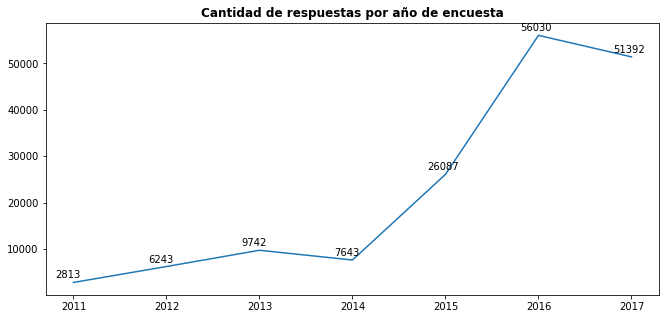

In [8]:
# query 0
# cuantas personas respondieron cada encuesta

consulta0 = encuestas.groupby('survey').count()['country']
plt.figure(figsize = (11,5))
plt.plot(list(consulta0));
plt.xticks(ticks = range(0, 7), labels = range(2011, 2018),)
plt.title('Cantidad de respuestas por año de encuesta', weight = 'bold', size = 12);

for i, x in enumerate(consulta0):
  plt.text(i - 0.2, x + 900, str(x))
  
# guardar grafica
plt.savefig(nombres_graficas[0], bbox_inches = Bbox([[0,0],[11,5]]))

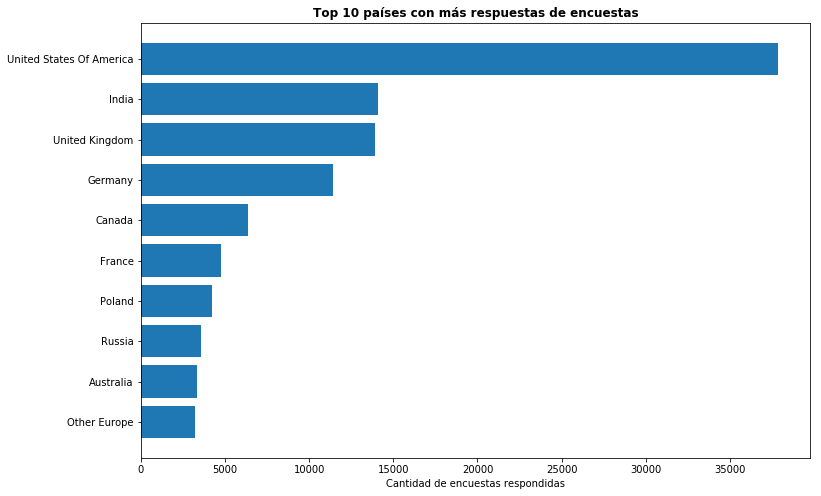

In [9]:
# query 1
# cuantos programadores respondieron por los 10 primeros paises

# generar tabla para la pregunta
consulta1 = (encuestas
             .groupby(['country',])
             .count()['occupation']
             .sort_values(ascending = False)[:10]
             .sort_values()
            )

#graficar
plt.figure(figsize = (12, 8)) # establecer tamano
plt.barh(y = consulta1.index, width = consulta1) # barras
plt.title('Top 10 países con más respuestas de encuestas', weight = 'bold'); # editar titulo
plt.xlabel('Cantidad de encuestas respondidas') # ajustar titulo eje x

top_paises = consulta1.copy()

# guardar grafica
plt.savefig(nombres_graficas[1], bbox_inches = Bbox([[-1,0],[12,8]]))

                  Language  Programmers
0               Javascript        75297
1                      Sql        63136
2                     Java        49448
3                       C#        43933
4                      Php        36355
5                   Python        34368
6            Visual Studio        30257
7                Notepad++        29288
8                      C++        27653
9               Sql Server        24793
10                       C        23097
11                 Node.Js        22191
12                     Vim        21861
13                 Android        20957
14               Angularjs        20719
15                 Eclipse        18465
16                   Mysql        16427
17                Intellij        15356
18                 Sublime        14434
19                 Mongodb        12768
20                    Atom        12365
21          Android Studio        12026
22         Windows Desktop        11949
23                    Ruby        11720


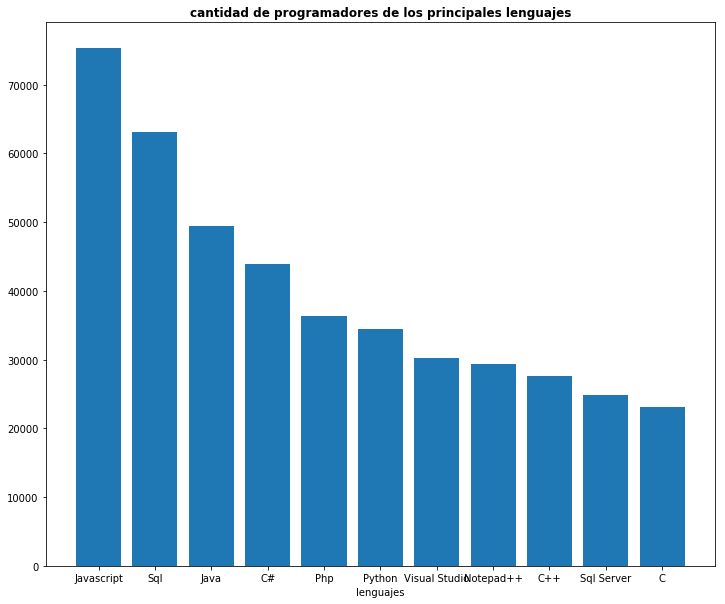

In [16]:
# query 2 Jhon 

# cuantos son los programadores que dominan cada uno de los lenguajes
consulta2 = []
ColumnadeLenguaje=list(encuestas['programming_language'])

#separacion de lenguajes
ListadeLenguajes = [re.split(';',x) for x in ColumnadeLenguaje]
ListadeCadaLenguaje = [j for i in ListadeLenguajes for j in i]

#calculo de la frecuencia
frecuencia = collections.Counter(ListadeCadaLenguaje).most_common(100)
frecuenciadf=pd.DataFrame.from_dict(frecuencia)
frecuenciadf=frecuenciadf.rename(columns = {0:'Language',1:'Programmers'})
frecuenciadf.sort_values('Programmers',ascending= False,inplace=True)

# filtro de lenguaje
filter = frecuenciadf['Language'].str.contains('^No language|^Other', na = False, regex = True)
frecuenciadf = frecuenciadf[~filter]
frecuenciadf = frecuenciadf.reset_index(drop=True)
print(frecuenciadf.head(len(frecuenciadf)))


#grafico de los 10 más usados
top_10_lenguajes = frecuenciadf[:11]

# crear grafica
plt.figure(figsize = (12, 10)) # ajustar tamano
plt.bar(x = top_10_lenguajes.Language, height = top_10_lenguajes.Programmers) # barras
plt.title('cantidad de programadores de los principales lenguajes', weight = 'bold'); # editar titulo
plt.xlabel('lenguajes',) # ajustar titulo eje x


plt.savefig(nombres_graficas[2], bbox_inches = Bbox([[-1,0],[12,10]]))

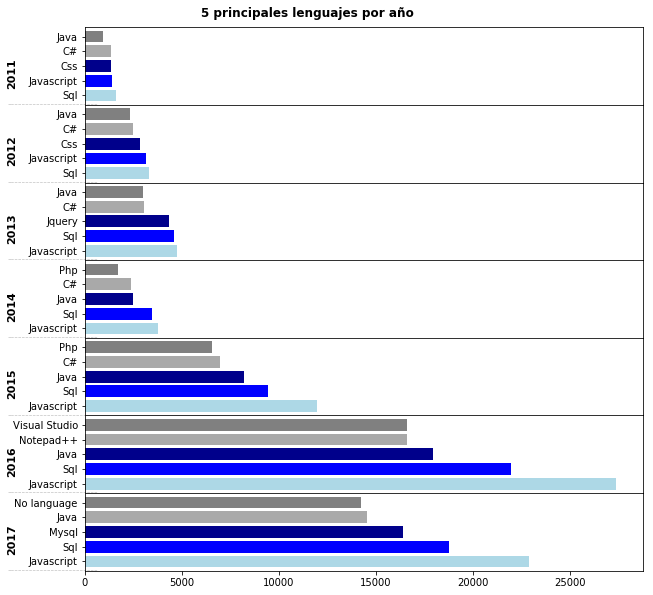

In [17]:
# query 3 Jhon
# cuales son los 5 lenguajes de programacion mas usados por encuesta

# crear copia de encuestas
consulta3 = encuestas[['survey','programming_language']].copy()

# crear nueva columna para contar lenguajes
consulta3['list_programming_language'] = consulta3['programming_language'].str.split(';')

# crear contenedores
anio = list(set(list(consulta3['survey'])))
anio.sort()
lenguaje = []
valor = []

# crear grafico contenedor
fig, axs = plt.subplots(len(anio), 1, figsize = (10,10), sharex = True)

for i,x in enumerate(anio):
    # filtrar por cada año
  lista = list(consulta3[consulta3['survey'] == anio[i]]['list_programming_language'])
  lista2 = pd.DataFrame([list(chain(*lista)), '1'*len(list(chain(*lista)))]).T
  
  
  lista3 = (lista2[lista2[0] != 'Other']
            .groupby(0)
            .count()
            .sort_values(by = 1, ascending = False)[:5]
           )
  axs[i].barh(y = list(lista3.index),
              width = list(lista3[1]),
              color = ['lightblue','blue','darkblue', 'darkgrey', 'grey']
             )
  axs[i].set_yticklabels(list(lista3.index), rotation = 'horizontal') # ajustar eje y
  axs[i].text(-4000, 2, anio[i], size = 11, weight = 'bold', rotation = 'vertical')
  axs[i].text(-4000, -0.8, '-'*25, alpha = 0.2)  # ajustar linea separadora
  

plt.subplots_adjust(wspace = 0, hspace = 0); # ajustar espacios entre las graficas
plt.text(6000, 
         37,
         '5 principales lenguajes por año', 
         size = 12, 
         weight = 'bold'
        ); # ajustar titulo
 
# guardar grafica
plt.savefig(nombres_graficas[3], bbox_inches = Bbox([[-1,0],[10,10]]), dpi = 1200 )

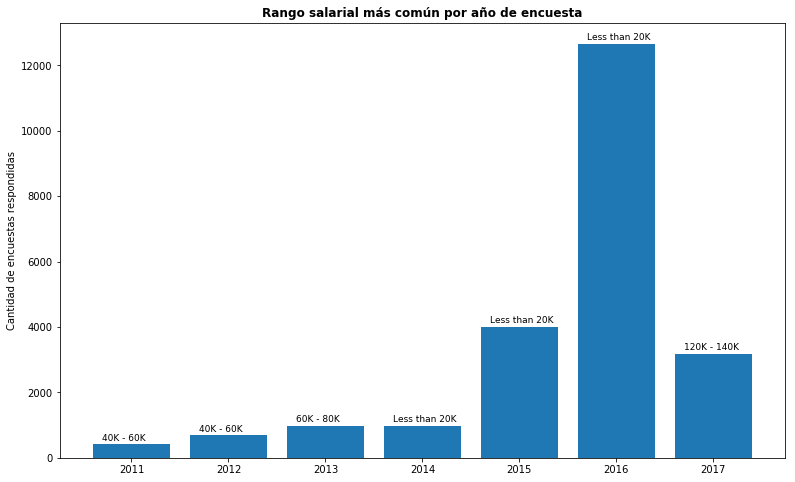

In [18]:
# query 4
# cual es el rango salarial mas comun por encuesta y cuantos programadores

# crear tabla  
consulta4 = (encuestas[encuestas['salary']!='Rather not say']
             .groupby(['salary','survey'])
             .count()['country']
            )

# crear contenedores de valores
valores = []
diccionario = {}

# iterador para consultar valores
for i in consulta4.unstack():
  valores.append(consulta4.unstack()[i].max()) 

# crear grafica
plt.figure(figsize = (13, 8)) # ajustar tamano
plt.bar(x = range(2011,2018), height = valores) # barras
plt.title('Rango salarial más común por año de encuesta', weight = 'bold'); # editar titulo

# crear iterador para agregar la marca del rango salarial
for i,x in enumerate(consulta4.unstack()):
  texto = list(consulta4.unstack()[x][consulta4.unstack()[x] == valores[i]].index)[0]
  plt.text(x = list(range(2011,2018))[i] - 0.3,
           y = consulta4.unstack()[x].max() + 120, 
           s = texto,
           ma =  'left',
           size = 9
          ) 
  diccionario.update({ str(list(range(2011,2018))[i]): 'valor: ' + str(valores[i]) + 
                      ' rango: ' + texto})
  
plt.ylabel('Cantidad de encuestas respondidas', rotation = 'vertical') # ajustar titulo eje y
  
# guardar grafica
plt.savefig(nombres_graficas[4], dpi = 1200)

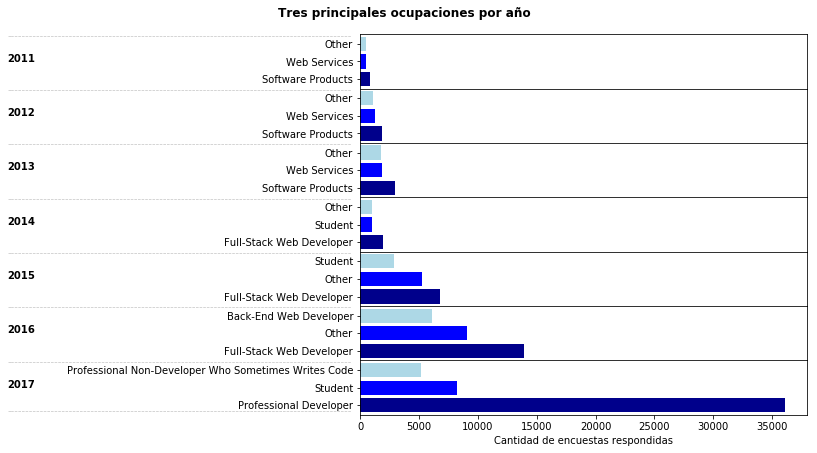

In [19]:
# query 5
# cuales son las tres pincipales ocupaciones por encuesta

# crear tablas
consulta5 = (encuestas
             .groupby(['survey','occupation'])
             .count()['country']
             .unstack()
             .T
            )

# crear contenedor de graficas
fig, axs = plt.subplots(7,1, figsize = (8,7), sharex = True)

# crear graficas individuales
for i,survey in enumerate(consulta5):
  # establecer tamano de las barras y colores
  axs[i].barh(y = list(consulta5[survey].sort_values(ascending = False)[:3].index), 
              width = list(consulta5[survey].sort_values(ascending = False)[:3]),
              color = ['darkblue','blue','lightblue']
             )
  axs[i].set_yticklabels(list(consulta5[survey]
                              .sort_values(ascending = False)[:3]
                              .index), 
                         rotation = 'horizontal') # ajustar eje y
  
  axs[i].text(-30000, 1, survey, weight = 'bold') # ajustar fecha de la encuesta
  axs[i].text(-30000, 2.3, '-'*95, alpha = 0.2)  # ajustar linea separadora
  
axs[6].text(-30000, -0.5, '-'*95, alpha = 0.2)  # ajustar linea separadora inicial
plt.subplots_adjust(wspace = 0, hspace = 0); # ajustar espacios entre las graficas
plt.text(-7000, 22, 'Tres principales ocupaciones por año', size = 12, weight = 'bold'); # ajustar titulo
plt.xlabel('Cantidad de encuestas respondidas') # ajustar titulo eje x

# guardar gráfica
plt.savefig(nombres_graficas[5], bbox_inches = Bbox([[-5,-1],[9,7]]), dpi = 1200)

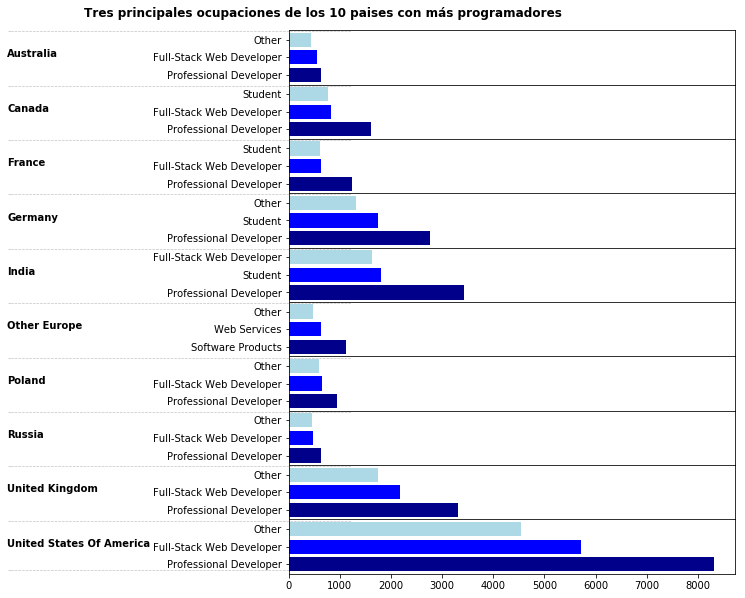

In [20]:
# query 6 Jhon
# principales 3 ocupaciones de los 10 paises con mas programadores

# crear tablas
encuestas6 = encuestas.copy()

# lista de los paises con más programadores
paisesConMas = list(encuestas6.groupby(['country'])['country'].count().sort_values(ascending=False).index)[:10]

#filtros para el grafico
baseSoloPaises = encuestas6[encuestas6['country'].isin(iter(paisesConMas))]
consulta6 = (baseSoloPaises.groupby(['country','occupation'])['occupation']
             .count()
             .sort_values(ascending=False)
             .unstack()
             .T
            )

# crear contenedor de graficas
fig, axs = plt.subplots(len(paisesConMas),1, figsize = (8,10), sharex = True)

# crear graficas individuales
for i,country in enumerate(consulta6):
  # establecer tamano de las barras y colores
  axs[i].barh(y = list(consulta6[country].sort_values(ascending = False)[:3].index), 
             width = list(consulta6[country].sort_values(ascending = False)[:3]),
             color = ['darkblue','blue','lightblue']
            )
  axs[i].set_yticklabels(list(consulta6[country].sort_values(ascending = False)[:3].index), 
                         rotation = 'horizontal') # ajustar eje y
  axs[i].text(-5500, 1, country, weight = 'bold') # ajustar fecha de la encuesta
  axs[i].text(-5500, 2.3, '-'*95, alpha = 0.2)  # ajustar linea separadora
  
axs[9].text(-5500, -0.5, '-'*95, alpha = 0.2)  # ajustar linea separadora inicial
plt.subplots_adjust(wspace = 0, hspace = 0); # ajustar espacios entre las graficas
plt.text(-4000, 
         31,
         'Tres principales ocupaciones de los 10 paises con más programadores', 
         size = 12, 
         weight = 'bold'
        ); # ajustar titulo

plt.savefig(nombres_graficas[6], dpi = 1200, bbox_inches = Bbox([[-16,0],[16,7]]))


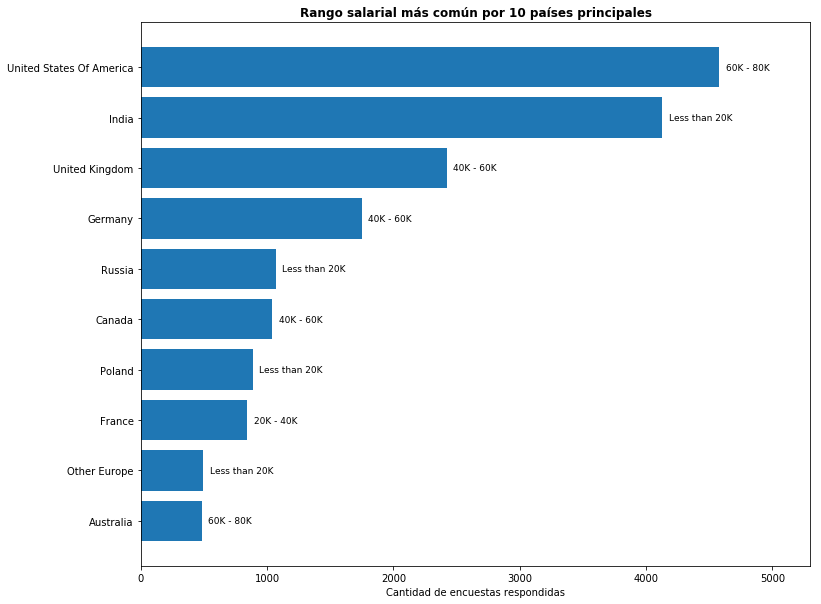

In [21]:
# query 7
# principal rango salarial por los 10 primeros paises

# crear tabla  
consulta7 = (encuestas[encuestas['salary']!='Rather not say']
             .groupby(['salary','country'])
             .count()['occupation']
            )

# crear contenedores de valores
consulta7_axs = (consulta7
                 .unstack()[top_paises.index]
                 .max()
                 .sort_values(ascending = True)
                )

valores = list(consulta7_axs)
diccionario = {}

# crear grafica
plt.figure(figsize = (12, 10)) # ajustar tamano
plt.barh(y = consulta7_axs.index, width = valores) # barras
plt.title('Rango salarial más común por 10 países principales', weight = 'bold'); # editar titulo
plt.xlim(0,5300)
plt.xlabel('Cantidad de encuestas respondidas') # ajustar titulo eje x

# crear iterador para agregar la marca del rango salarial
for i,x in enumerate(consulta7.unstack()[top_paises.index]):
  
  texto = str(list(consulta7.unstack()[consulta7_axs.index[i]][consulta7.unstack()[consulta7_axs.index[i]] 
                                                                                   == valores[i]].index)[0])
             
  plt.text(y = i - 0.05,
           x = valores[i] + 50, 
           s = texto,
           ma =  'center',
           size = 9
          ) 

# guardar grafica
plt.savefig(nombres_graficas[7], bbox_inches = Bbox([[-1,0],[12,10]]))#, dpi = 1200)

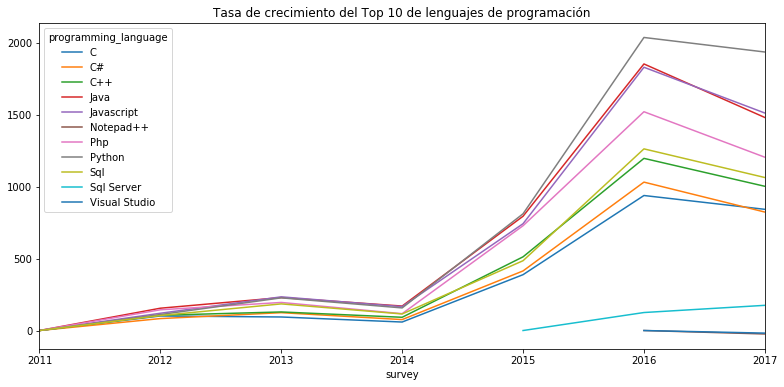

In [22]:
# query 8 Jhon
# cual es el crecimiento en las encuestas de los 10 principales lenguajes

#---------------------codigo util para el punto 5-------------------------------
consulta8 = encuestas[['survey','programming_language']].copy()
consulta8['list_programming_language'] = consulta8['programming_language'].str.split(';')

conteo_lenguajes_anio= pd.DataFrame()

anio = list(set(list(consulta8['survey'])))
  
for i,x in enumerate(anio):
  lista8 = list(consulta8[consulta8['survey'] == anio[i]]['list_programming_language'])
  lista8_1 = pd.DataFrame([list(chain(*lista8)),'1'*len(list(chain(*lista8)))]).T

  lista8_1['survey'] = str(anio[i])
  lista8_1=lista8_1.rename(columns={0: "programming_language",1:'quantity'})
  Series_lenguajes = (lista8_1
                      .groupby(['survey','programming_language'])
                      .count()['quantity']
                      .sort_values(ascending = False)
                      .reset_index()
                     )
  conteo_lenguajes_anio = pd.concat([conteo_lenguajes_anio,Series_lenguajes]).reset_index(drop=True)
  
 ## dataframe ordenado por lenguaje con año de menor a mayor
conteo_lenguajes_anio = conteo_lenguajes_anio.sort_values(['programming_language','survey'], 
                                                           ascending=[True, True]
                                                          )
conteo_lenguajes_anio = conteo_lenguajes_anio.reset_index(drop=True)

## calculo de la columna con la tasa de crecimiento con año base referencia para homogenizar la info

conteo_lenguajes_anio['growth'] = 0
for i, value in conteo_lenguajes_anio.iterrows():
  if conteo_lenguajes_anio.iloc[i,1] == conteo_lenguajes_anio.iloc[i-1,1]:
      conteo_lenguajes_anio.iloc[i,3] = int(round(((conteo_lenguajes_anio.iloc[i,2]-temp_anio_base)/
                                                   (temp_anio_base))*100))
  else:
      temp_anio_base = conteo_lenguajes_anio.iloc[i,2]
      
#se filtran los 10 lenguajes más populares de las encuestas
top_10_lenguajes_frec = list(frecuenciadf['Language'][:11])
conteo_lenguajes_anio_top_10 = (conteo_lenguajes_anio[conteo_lenguajes_anio['programming_language']
                                                      .isin(iter(top_10_lenguajes_frec))]
                                .reset_index(drop=True)
                               )


#graficos
 

#top_10_lenguajes_frec
#--------------------------------------------------------------------
seleccion = conteo_lenguajes_anio_top_10.iloc[:,[0,1,3]]

fig, ax = plt.subplots(figsize=(13,6))
seleccion.groupby(['survey','programming_language']).max()['growth'].unstack().plot(ax=ax)
plt.title('Tasa de crecimiento del Top 10 de lenguajes de programación')
plt.savefig(nombres_graficas[8], dpi = 1200)

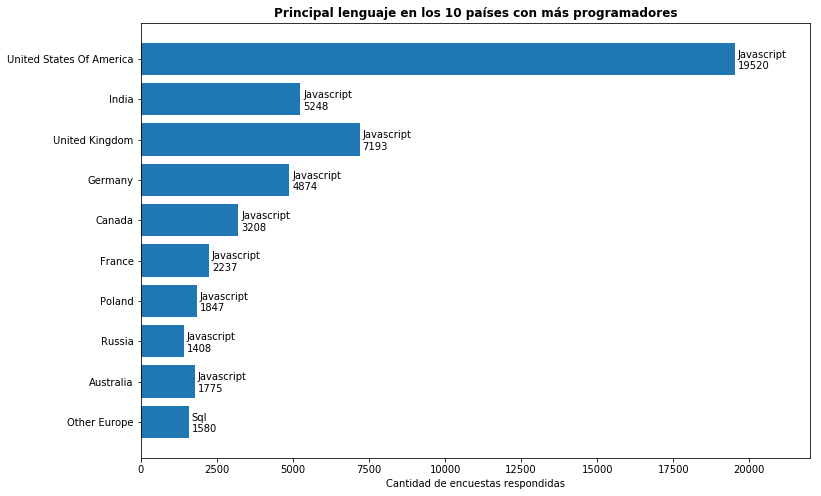

In [23]:
# query 9
# cual es el lenguaje mas popular en los 10 paises con mas programadores

# crear tabla
consulta9 = encuestas[['country','programming_language']]

# filtrar por paises
consulta9 = consulta9[consulta9['country'].isin(list(top_paises.index))]

# crear nueva columna para contar lenguajes
consulta9['list_programming_language'] = consulta9['programming_language'].str.split(';')

# crear contenedores
lenguaje = []
valor = []

# realizar iterador sobre los paises
for i,x in enumerate(top_paises.index):
  
  # filtrar por cada pais
  lista = list(consulta9[consulta9['country'] == top_paises.index[i]]['list_programming_language'])
  
  # iterar sobre cada elemento y convertir en un dataframe
  lista2 = pd.DataFrame([list(chain(*lista)), '1'*len(list(chain(*lista)))]).T
  
  # filtrar otros lenguajes y contar
  lista3 = (lista2[lista2[0] != 'Other']
            .groupby(0)
            .count()
            .sort_values(by = 1, ascending = False)[:1]
           )
  
  # agregar valores a listas
  lenguaje.append(lista3.index[0])
  valor.append(list(lista3[1])[0])

# crear grafica  
plt.figure(figsize = (12, 8)) # establecer tamano
plt.barh(y = top_paises.index, width = valor,) # crear barras
plt.title('Principal lenguaje en los 10 países con más programadores', 
          size = 12, 
          weight = 'bold'
         ) # ajustar titulo
plt.xlim(0, 22000) # establecer limites
plt.xlabel('Cantidad de encuestas respondidas') # ajustar titulo eje x

# agregar etiqueta de lenguaje
for i,x in enumerate(lenguaje):
  plt.text(valor[i] + 100, i - 0.25, lenguaje[i] + '\n' + str(valor[i]))
  
# guardar grafica
plt.savefig(nombres_graficas[9], bbox_inches = Bbox([[-1,0],[12,8]]))#, dpi = 1200)

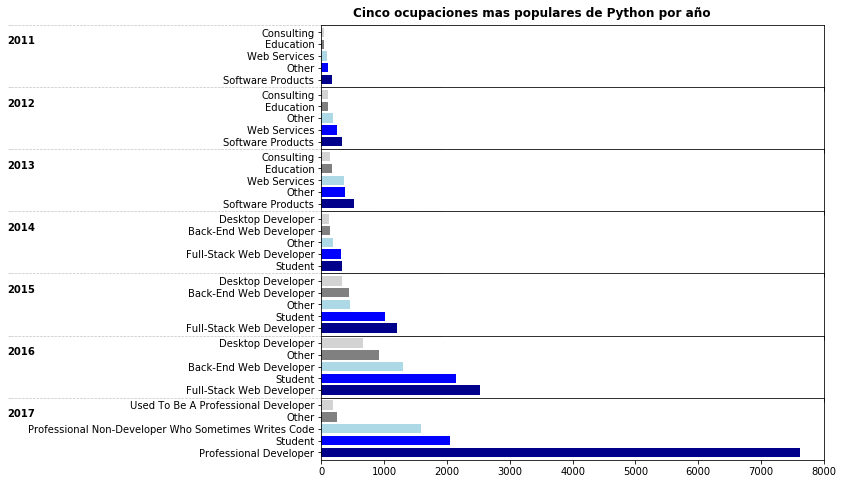

In [24]:
# query 10 Jhon
# cuales son las 5 ocupaciones mas populares de python por encuesta
encuesta_python = encuestas.copy()
filter = encuesta_python['programming_language'].str.contains('Python', na = False, regex = True)
encuestas_python_filtrada = encuesta_python[filter]
encuestas_python_filtrada

# crear tablas
consulta10 = encuestas_python_filtrada.groupby(['survey','occupation']).count()['country'].unstack().T

# crear contenedor de graficas
fig, axs = plt.subplots(7,1, figsize = (9,8), sharex = True)

# crear graficas individuales
for i,survey in enumerate(consulta10):
  
  # establecer tamano de las barras y colores
  axs[i].barh(y = list(consulta10[survey].sort_values(ascending = False)[:5].index), 
             width = list(consulta10[survey].sort_values(ascending = False)[:5]),
             color = ['darkblue','blue','lightblue','gray','lightgray']
            )
  axs[i].set_yticklabels(list(consulta10[survey].sort_values(ascending = False)[:5].index), 
                         rotation = 'horizontal') # ajustar eje y
  axs[i].text(-5000, 3, survey, weight = 'bold') # ajustar fecha de la encuesta
  axs[i].text(-5000, 4.4, '-'*120, alpha = 0.2)  # ajustar linea separadora
  
plt.subplots_adjust(wspace = 0, hspace = 0); # ajustar espacios entre las graficas
# ajustar titulo
plt.text(500,37, 'Cinco ocupaciones mas populares de Python por año', size = 12, weight = 'bold'); 

plt.savefig(nombres_graficas[10], dpi = 1200, bbox_inches = Bbox([[-16,0],[16,7]]))

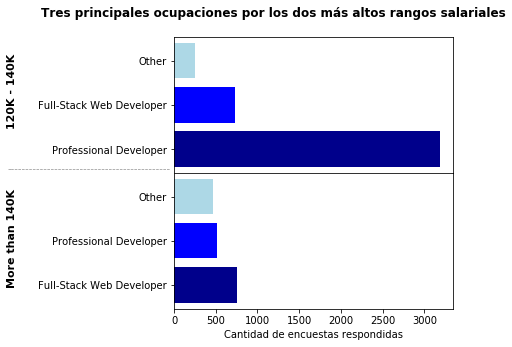

In [25]:
# query 11
# cuales son las 3 ocupaciones con mas programadores con los mas altos rangos salariales

consulta11 = (encuestas
              .groupby(['salary','occupation'])
              .count()['country']
              .unstack()
              .T[['120K - 140K', 'More than 140K']]
             )

# crear contenedor de graficas
fig, axs = plt.subplots(2,1, figsize = (5,5), sharex = True)


# crear graficas individuales
for i,salary in enumerate(consulta11):
  # establecer tamano de las barras y colores
  axs[i].barh(y = list(consulta11[salary].sort_values(ascending = False)[:3].index), 
              width = list(consulta11[salary].sort_values(ascending = False)[:3]),
              color = ['darkblue','blue','lightblue']
             )
  axs[i].set_yticklabels(list(consulta11[salary].sort_values(ascending = False)[:3].index), 
                         rotation = 'horizontal') # ajustar eje y
  axs[i].text(-2000, 2, salary, size = 11, weight = 'bold', rotation = 'vertical')
  axs[0].text(-2000, -0.5, '-'*45, alpha = 0.2)  # ajustar linea separadora
  
plt.subplots_adjust(wspace = 0, hspace = 0); # ajustar espacios entre las graficas
axs[0].text(-1600,
            3,
            'Tres principales ocupaciones por los dos más altos rangos salariales', 
            size = 12, 
            weight = 'bold',
           ); # ajustar titulo

plt.xlabel('Cantidad de encuestas respondidas') # ajustar titulo eje x

# guardar grafica
plt.savefig(nombres_graficas[11], bbox_inches = Bbox([[-2,0],[5,5]]))

In [0]:
# query 12 Jhon
# cual es el pais mas experto e inexperto programando por encuesta

consulta12 = []
# borrar consulta12 = [] cuando se tenga lista la pregunta

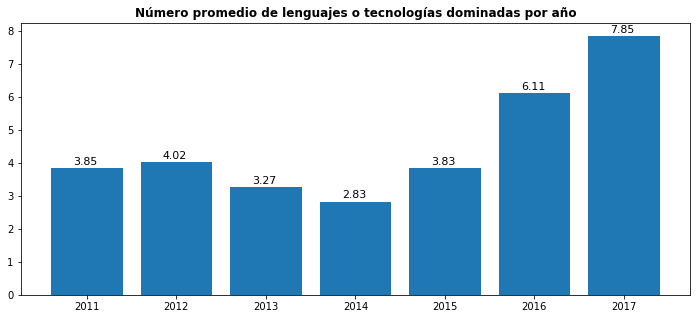

In [28]:
# query 13
# numero promedio de lenguajes que saben los programadores por encuesta

# crear dataframe
consulta13 = encuestas.copy()

# crear columna que cuenta la cantidad de lenguajes
consulta13['number_languages'] = consulta13['programming_language'].str.count(';') + 1

# modificar los que no tienen lenguaje por cero
consulta13.loc[consulta13['programming_language'] == 'No language','number_languages'] = 0

# crear dataframe para el grafico
consulta13_axs = consulta13.groupby('survey').mean()['number_languages']

# crear figura
plt.figure(figsize = (12, 5)) # ajustar tamano
plt.bar(x = range(2011,2018), height = list(consulta13_axs)) # crear barras
plt.title('Número promedio de lenguajes o tecnologías dominadas por año', weight = 'bold') # ajustar titutlo
plt.xticks(range(2011,2018)); # ajustar eje x

# crear etiqueta de texto
for i,x in enumerate(consulta13_axs):
  # crear texto redondeando el promedio
  texto = str(round(list(consulta13_axs)[i],2))
  # ajustar posicion y tamano
  plt.text(x = list(range(2011,2018))[i] - 0.15,
           y = list(consulta13_axs)[i] + 0.1, 
           s = texto,
           ma =  'left',
           size = 11
          )
  
# guardar grafica
plt.savefig(nombres_graficas[13], dpi = 1200, bbox_inches = Bbox([[0,0],[12,5]]))

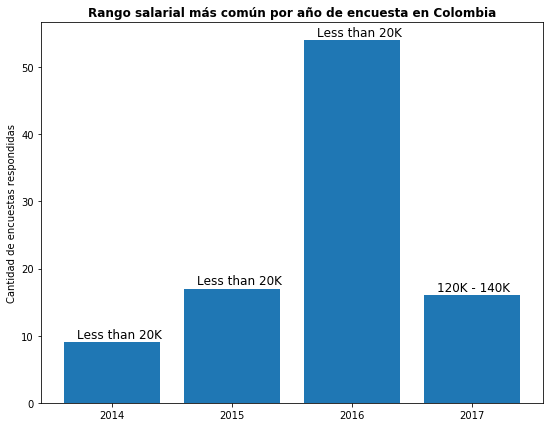

In [29]:
# query 14
# cuanto es el salario en colombia por encuesta

# crear tabla de preparacion
prep14 = encuestas[(encuestas['country'] == 'Colombia') & (encuestas['salary'] != 'Rather not say')]

# crear dataframe
consulta14 = prep14.groupby(['salary','survey']).count()['occupation']

# crear contenedores
valores = []
diccionario = {}
anio = list(consulta14.unstack().columns)

# rellenar valores
for i in consulta14.unstack():
  valores.append(consulta14.unstack()[i].max())

# crear figura
plt.figure(figsize = (9, 7)) # ajustar tamano
plt.bar(x = anio, height = valores) # crear barras
plt.title('Rango salarial más común por año de encuesta en Colombia', weight = 'bold') # ajustar titutlo
plt.xticks(anio); # ajustar eje x
plt.ylabel('Cantidad de encuestas respondidas', rotation = 'vertical') # ajustar titulo eje y

# crear etiqueta de texto
for i,x in enumerate(consulta14.unstack()):
  texto = list(consulta14.unstack()[x][consulta14.unstack()[x] == valores[i]].index)[0]
  plt.text(x = anio[i] - 0.29,
           y = consulta14.unstack()[x].max() + 0.7, 
           s = texto,
           ma =  'left',
           size = 20 - 2*len(anio)
          ) 
  # modificar diccionario
  diccionario.update({ str(anio[i]): 'valor: ' + str(valores[i]) + ' rango: ' + texto})
  
# guardar grafica
plt.savefig(nombres_graficas[14], bbox_inches = Bbox([[0,0],[9,7]]), dpi = 1200)

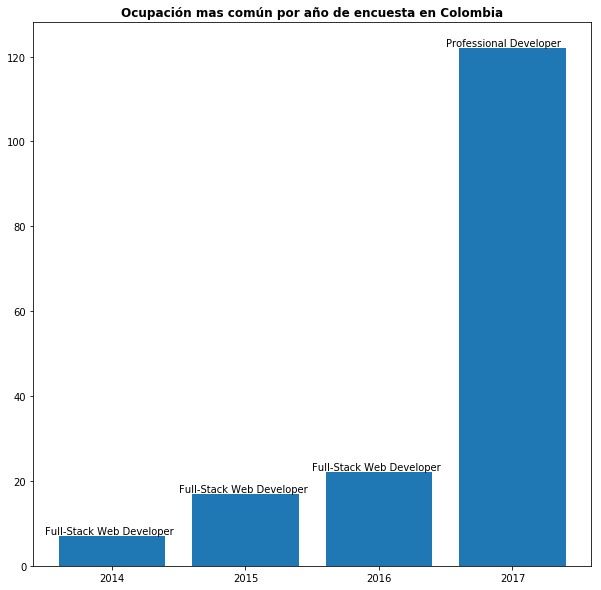

In [30]:
# query 15 Jhon
# cuanto es la ocupacion mas popular en colombia por encuesta

tabla_previa = encuestas[(encuestas['country'] == 'Colombia')]

# crear dataframe
consulta15 = tabla_previa.groupby(['occupation','survey']).count()['salary']

# crear contenedores
valores15 = []
diccionario15 = {}
anio = list(consulta15.unstack().columns)

# rellenar valores
for i in consulta15.unstack():
  valores15.append(consulta15.unstack()[i].max()) 

# crear figura
plt.figure(figsize = (10, 10)) # ajustar tamano
plt.bar(x = anio, height = valores15) # crear barras
plt.title('Ocupación mas común por año de encuesta en Colombia', weight = 'bold') # ajustar titutlo
plt.xticks(anio); # ajustar eje x

# crear etiqueta de texto
for i,x in enumerate(consulta15.unstack()):
  texto = list(consulta15.unstack()[x][consulta15.unstack()[x] == valores15[i]].index)[0]
  plt.text(x = anio[i] - 0.5,
           y = consulta15.unstack()[x].max() + 0.5, 
           s = texto,
           ma =  'center'
          ) 
  # modificar diccionario
  diccionario15.update({ str(anio[i]): 'valor: ' + str(valores15[i]) + ' rango: ' + texto})
  
plt.savefig(nombres_graficas[15], dpi = 1200, bbox_inches = Bbox([[0,0],[20,10]]))

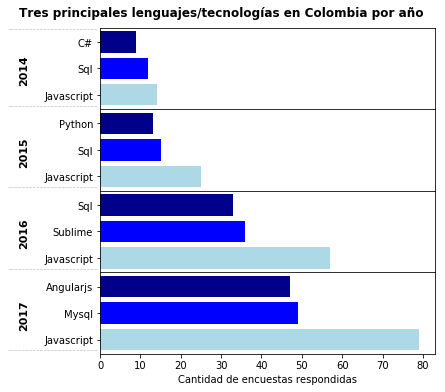

In [31]:
# query 16
# cuales son los 3 lenguajes mas usados en colombia por encuesta

# crear tabla de colombia
consulta16 = encuestas[encuestas['country'] == 'Colombia'][['survey','programming_language']]

# crear nueva columna para contar lenguajes
consulta16['list_programming_language'] = consulta16['programming_language'].str.split(';')

# crear contenedores
anio = list(set(list(consulta16['survey'])))
anio.sort()
lenguaje = []
valor = []

# crear grafico contenedor
fig, axs = plt.subplots(len(anio), 1, figsize = (6,6), sharex = True)

# realizar iterador sobre las encuestas
for i,x in enumerate(anio):
  
  # filtrar por cada pais
  lista = list(consulta16[consulta16['survey'] == anio[i]]['list_programming_language'])
  
  # iterar sobre cada elemento y convertir en un dataframe
  lista2 = pd.DataFrame([list(chain(*lista)), '1'*len(list(chain(*lista)))]).T
  
  
  # filtrar otros lenguajes y contar
  lista3 = (lista2[lista2[0] != 'Other']
            .groupby(0)
            .count()
            .sort_values(by = 1, ascending = False)[:3]
           )
  
  axs[i].barh(y = list(lista3.index),
              width = list(lista3[1]),
              color = ['lightblue','blue','darkblue']
             )
  
  axs[i].set_yticklabels(list(lista3.index), rotation = 'horizontal') # ajustar eje y
  axs[i].text(-20, 1.2, anio[i], size = 11, weight = 'bold', rotation = 'vertical')
  axs[i].text(-23, -0.5, '-'*25, alpha = 0.2)  # ajustar linea separadora
  
  
axs[0].text(-23, 2.4, '-'*25, alpha = 0.2)  # ajustar linea separadora
plt.subplots_adjust(wspace = 0, hspace = 0); # ajustar espacios entre las graficas
plt.text(-20, 
         len(anio)*3.05,
         'Tres principales lenguajes/tecnologías en Colombia por año', 
         size = 12, 
         weight = 'bold'
        ); # ajustar titulo

plt.xlabel('Cantidad de encuestas respondidas') # ajustar titulo eje x
  
# guardar grafica
plt.savefig(nombres_graficas[16], bbox_inches = Bbox([[-1,0],[6,6]]), dpi = 1200 )

### Representación visual de la bodega de datos
---

Adjunte sobre la bodega de datos los modelos de Estrella, Cubo y Malinowski.

#### Cubo

In [0]:
# datos para el cubo
cubo = encuestas[(encuestas['country'] == 'Colombia') | 
                 (encuestas['country'] == 'Ecuador') | 
                 (encuestas['country'] == 'Mexico')]

cara_pais_encuesta = (cubo
                      .groupby(['country','survey'])
                      .count()['salary']
                      .unstack()
                     )

cara_pais_salario = (cubo
                     .groupby(['country','salary'])
                     .count()['survey']
                     .unstack()
                    )

cara_encuesta_salario = (encuestas
                         .groupby(['survey','salary'])
                         .count()['country']
                         .unstack()
                        )

# cara_pais_encuesta
# cara_pais_salario
# cara_encuesta_salario

In [0]:
# visualizar cubo
display(Image(filename = 'Archivos_SBDM_20191/modelo-cubo.PNG'))

#### Estrella

In [0]:
# datos estrella

# contenedor
datos = []

# contar unicos por columna
for i in encuestas:
  datos.append(i + ': ' + str(len(set(encuestas[i]))))

# contar unicos por lenguaje de programacion
lista = encuestas['programming_language']
lista2 = [a.split(';') for a in list(lista)]
lista2 = chain(*lista2)

datos.append('unique programming language: ' + str(len(set(list(lista2)))))

# datos

In [0]:
# visualizar estrella
display(Image(filename = 'Archivos_SBDM_20191/Estrella.PNG'))

#### Malinowski

In [0]:
# visualizar malinowski
display(Image(filename = 'Archivos_SBDM_20191/Malinowski.PNG'))

### MapReduce
---

Aplique MapReduce para llevar esos datos a una base de datos NoSQL que permita agrupar el número de programadores por lenguaje de programación

In [0]:
# prueba1
print("hello world")

hello world


Espacio para el MapReduce

### Pronóstico 2018
---
Prediga cuáles serían las respuestas de una nueva encuesta en el 2018.

In [0]:
# prueba2
print("hello world")

prueba2


In [0]:
#codigo de crecimiento de uso de los lenguajes de programación
consulta8 = encuestas[['survey','programming_language']].copy()
consulta8['list_programming_language'] = consulta8['programming_language'].str.split(';')

conteo_lenguajes_anio= pd.DataFrame()

anio = list(set(list(consulta8['survey'])))
  
for i,x in enumerate(anio):
  lista8 = list(consulta8[consulta8['survey'] == anio[i]]['list_programming_language'])
  lista8_1 = pd.DataFrame([list(chain(*lista8)),'1'*len(list(chain(*lista8)))]).T

  lista8_1['survey'] = str(anio[i])
  lista8_1=lista8_1.rename(columns={0: "programming_language",1:'quantity'})
  Series_lenguajes = lista8_1.groupby(['survey','programming_language']).count()['quantity'].sort_values(ascending = False).reset_index()
  conteo_lenguajes_anio = pd.concat([conteo_lenguajes_anio,Series_lenguajes]).reset_index(drop=True)
 ## dataframe ordenado por lenguaje con año de menor a mayor
conteo_lenguajes_anio = conteo_lenguajes_anio.sort_values(['programming_language','survey'], ascending=[True, True])
conteo_lenguajes_anio = conteo_lenguajes_anio.reset_index(drop=True)

#---------------------codigo base para pronosticar uso de los lenguajes por año el punto 5-------------------------------

#se escogen los principales lenguajes del dataframe
anio_lenguaje = conteo_lenguajes_anio.copy()


for i, value in anio_lenguaje.iterrows():
  if anio_lenguaje.iloc[i,1] == anio_lenguaje.iloc[i-1,1]:
      anio_lenguaje.iloc[i,3] = int(round((anio_lenguaje.iloc[i,2]-anio_lenguaje.iloc[i-1,2])/(anio_lenguaje.iloc[i-1,2])))*100
anio_lenguaje  


In [0]:
anio_lenguaje = conteo_lenguajes_anio.copy()


for i, value in anio_lenguaje.iterrows():
  if anio_lenguaje.iloc[i,1] == anio_lenguaje.iloc[i-1,1]:
      anio_lenguaje.iloc[i,3] = int(round(((anio_lenguaje.iloc[i,2]-anio_lenguaje.iloc[i-1,2])/(anio_lenguaje.iloc[i-1,2]))*100))
anio_lenguaje  

,survey,programming_language,quantity,growth
0,2017,.Net Core,6763,0
1,2015,Amazon Web Services,1,0
2,2017,Amazon Web Services,8183,818200
3,2011,Android,1,0
4,2012,Android,8,700
5,2013,Android,10,25
6,2014,Android,16,60
7,2015,Android,4110,25588
8,2016,Android,8601,109
9,2017,Android,8211,-5


Espacio para pronóstico

### Actualización de la bodega
Genere una rutina que permita ingresar un registro en cualquiera de las encuestas y que actualice todos los indicadores hacia delante.

In [0]:
# se crean listas de validadores
lista_survey = list(set(list(encuestas['survey'])))
lista_salary = list(set(list(encuestas['salary'])))
lista_country = list(set(list(encuestas['country'])))
lista_years_programming = list(set(list(encuestas['years_programming'])))
lista_survey = [str(a) for a in lista_survey]
lista_survey.sort
lista_salary.sort
lista_country.sort
lista_years_programming.sort;

In [0]:
# se crea funcion para ingresar un nuevo dato a la bodega de datos

def ingresar_registro():
  
  """ingresar_registro()

    Esta función inicia automáticamente la validación de una nueva respuesta 
    a la tabla encuestas, donde al usuario se le solicita ingresar un dato a 
    la vez. Si el dato es válido, se inicia el proceso de limpieza de dicho 
    dato.

    Si todos los datos son válidos, esta función devuelve un pandas.DataFrame 
    con la misma estructura de encuestas. En caso contrario, devuelve None.

    Para ingresar el registro validado a la tabla encuestas, puede ejecutar el
    siguiente código:

    # NOT RUN

    # se ingresa el nuevo dato
    nuevo_dato = ingresar_registro()

    # se verifica si el dato es valido
    if nuevo_dato is None:
      print('\nIngrese datos correctos por favor')
      
    else:
      encuestas = pd.concat([encuestas,nuevo_dato], ignore_index = True)

    encuestas.tail()

    # NOT RUN

  """

  print('Por favor ingrese la información en inglés y de acuerdo a las opciones que aparezcan\n')

  # crear diccionario del nuevo registro
  nuevo_registro = {}

  # crear dato de columna 'survey'
  print('Años válidos\n', lista_survey)
  dato = verificar_lista('Año', lista_survey)

  # validar que dato sea no nulo
  if(dato is None):
    return None
  nuevo_registro.update({'survey': int(dato)}) 

  # crear dato de columna 'country'
  print('\nPaíses válidos\n', lista_country)
  dato = verificar_lista('País', lista_country)

  if(dato is None):
    return None
  nuevo_registro.update({'country': dato})

  # crear dato de columna 'years_programming'  
  print('\nRangos de años válidos\n', lista_years_programming)
  dato = verificar_lista('Años de experiencia programando', lista_years_programming)

  if(dato is None):
    return None
  nuevo_registro.update({'years_programming': dato})

  # crear dato de columna 'occupation', este no se valida ya que puede ser una nueva
  nuevo_registro.update({'occupation': input('\nIngrese ocupación:')})

  # crear dato de columna 'salary'
  print('\nRangos de salario válidos\n', lista_salary)
  dato = verificar_lista('Rango salarial', lista_salary)

  if(dato is None):
    return None
  nuevo_registro.update({'salary': dato})

  # crear dato de columna 'programming_language', este no se valida ya que puede ser uno nuevo
  nuevo_registro.update({'programming_language': input('\nIngrese lenguajes separados por punto y coma ";":')}) # programming_languages 

  # se validan los registros
  for i in nuevo_registro.values():
    if (i is None or i == 'Cancelar'):
      nuevo_registro = {}
      
  # validador de diccionario
  if nuevo_registro == {}:
    return None
    print('\nIngrese datos correctos por favor')
  
  # limpieza de diccionario valido
  else:

    # crear dataframe
    nuevo_registro_df= pd.DataFrame(nuevo_registro, index = [0])

    # limpiar ocupaciones
    lista = list(nuevo_registro_df['occupation'])

    # reemplazar nulos
    lista2 = reemplazar_none(lista,'None of these')

    # organizar mayusculas y minusculas
    lista3 = [a.replace('.','').upper().title() for a in lista2]

    # crear un iterador para resolver algunos casos puntuales
    for i,a in enumerate(lista3):

      if a in ['Mobile Developer - Android', 'Mobile Developer - Ios', 'Mobile Developer - Windows Phone','Mobile Application Developer']:
        lista3[i] = 'Mobile Developer'

      elif a == 'Desktop Software Developer':
        lista3[i] = 'Desktop Developer'

      elif a == 'None Of These' or a == "I Don'T Work In Tech" or a == 'None':
        lista3[i] = 'Other'

      elif a == 'Enterprise Level Services Developer':
        lista3[i] = 'Enterprise Level Services'

    # se devuelve la correccion    
    nuevo_registro_df['occupation'] = lista3

    # limpiar lenguajes 
    lenguajes = ['Javascript', 'C#', 'Java', 'Notepad++', 'Sql', 'Android', 'Angularjs', 'C', 'C++', 'Php',
                 'Sql Server', 'Atom', 'Python', 'Sublime', 'Node.Js', 'Vim', 'Windows Desktop', 'Mongodb',
                 'Mysql', 'Azure', 'Gae', 'Sublime Text', 'Visual Studio', 'Ios', 'Objective-C', 'Jquery',
                 'Css', 'Ruby', 'Arduino / Raspberry Pi', 'Linux Desktop', 'Emacs', 'Redis', '.Net Core',
                 'Wordpress', 'Eclipse', 'Android Studio', 'Html5', 'Lamp', 'Coffeescript', 'Perl',
                 'Amazon Web Services', 'Assembly', 'C++11', 'Postgresql', 'Visual Basic', 'Intellij',
                 'Go', 'Cassandra', 'Hadoop', 'Matlab', 'R', 'Cordova', 'Mac Os', 'Sqlite', 'Oracle',
                 'Windows Phone', 'React', 'Scala', 'Swift', 'Xcode', 'Groovy', 'Haskell', 'Phpstorm',
                 'Xamarin', 'Clojure', 'Sharepoint', 'Netbeans']

    patron = '^ |\\(.*\\)|.*[Ff]uck.*| $'

    prueba = nuevo_registro_df['programming_language']
    
    # limpiar lenguajes
    prueba2 = [re.sub(patron,'',a).replace('; ',';') for a in prueba]
    prueba3 = [a.split(';') for a in prueba2]

    # encontrar si cada lenguaje pertenece a los tops elegidos
    for j,a in enumerate(prueba3):
      
      # se verifica si es una lista de lenguajes
      if type(a) is list:
        
        # en caso de que asi sea, se limpia cada elemento  
        for i,lan in enumerate(a):

          lan = lan.upper().title()
          lan = re.sub(patron,'',lan)

          if lan == '':
            a[i] = 'No language'

          elif lan not in lenguajes:
            a[i] = 'Other'

          else:
            a[i] = lan

      # si solo es un lenguaje, se repite el proceso
      else:
        a = a.upper().title()
        a = re.sub(patron,'',a)

        if a == '':
          prueba3[j] = 'No language'

        elif a == ['']:
          prueba3[j] = 'No language'

        elif a not in lenguajes:
          prueba3[j] == 'Other'

        else:
          prueba3[j] = a

    # se devuelve la lista limpia
    prueba3 = [';'.join(a) for a in prueba3]
    nuevo_registro_df['programming_language'] = prueba3

    # se devuelve el dataframe limpio
    return nuevo_registro_df
    print('Registro válido y listo para ingresar a encuestas')

In [0]:
# se ingresa el nuevo dato
nuevo_dato = ingresar_registro()

# se verifica si el dato es valido
if nuevo_dato is None:
  print('\nIngrese datos correctos por favor')
else:
  encuestas = pd.concat([encuestas,nuevo_dato], ignore_index = True)
  
encuestas.tail()

Por favor ingrese la información en inglés y de acuerdo a las opciones que aparezcan

Años válidos
 ['2016', '2017', '2011', '2012', '2013', '2014', '2015']
Ingrese Año (Escriba "Cancelar" para cancelar): 2013

Países válidos
 ['Other Europe', 'Antigua & Deps', 'Bahamas', 'Moldova', 'Polynesia (French)', 'Finland', 'Vanuatu', 'Other Asia', 'Costa Rica', 'Tajikistan', 'Switzerland', 'British Indian Ocean Territory', 'Africa', 'Pakistan', 'Grenada', 'Malaysia', 'Cyprus', 'Norway', 'South Korea', 'United Arab Emirates', 'Laos', 'Australia', 'Hungary', 'Martinique (French)', 'Russia', 'Puerto Rico', 'Angola', 'Sudan', 'Ethiopia', 'Dominican Republic', 'Zimbabwe', 'Bouvet Island', 'Afghanistan', 'Macau', 'Yemen', 'Kosovo', 'Denmark', 'Madagascar', 'Algeria', 'Eritrea', 'Liechtenstein', 'North America (Other)', 'India', 'Bangladesh', 'Mauritania', 'Tunisia', 'Spain', 'Venezuela', 'Lesotho', 'Oman', 'El Salvador', 'Guatemala', 'Ireland', 'Senegal', 'Bolivia', 'North Korea', 'South America', '

,survey,country,years_programming,occupation,salary,programming_language
159946,2017,Pakistan,Less than 2 years,Professional Developer,Rather not say,C++;C#;Php;Sql;Other;Sql Server;Mysql;Sqlite;W...
159947,2017,United States Of America,Less than 2 years,Student,Rather not say,Java;Python;Android;Notepad++;Android Studio;O...
159948,2017,Canada,Less than 2 years,Professional Developer,20K - 40K,Javascript;Sql
159949,2017,India,Less than 2 years,Professional Developer,Rather not say,Php;Node.Js;Mysql;Wordpress;Eclipse;Other
159950,2013,Colombia,Less than 2 years,Student,Less than 20K,Python;R;Postgresql;Other


In [0]:
# se recrean los nombres de las graficas para recalcular indicadores

nombres_graficas = []
for i in range(0,17):
  nombres_graficas.append('Archivos_SBDM_20191/query' + str(i) + '-v2.PNG')
  
#nombres_graficas

=== Executing: ===

consulta0 = encuestas.groupby('survey').count()['country']
plt.figure(figsize = (11,5))
plt.plot(list(consulta0));
plt.xticks(ticks = range(0, 7), labels = range(2011, 2018),)
plt.title('Cantidad de respuestas por año de encuesta', weight = 'bold', size = 12);

for i, x in enumerate(consulta0):
  plt.text(i - 0.2, x + 900, str(x))
  
# guardar grafica
plt.savefig(nombres_graficas[0], bbox_inches = Bbox([[0,0],[11,5]]))
=== Output: ===


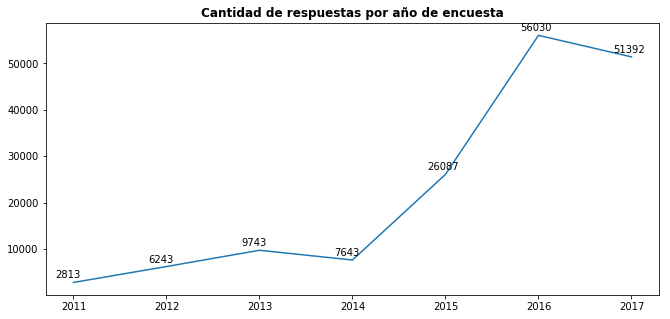

=== Executing: ===
consulta1 = (encuestas
             .groupby(['country',])
             .count()['occupation']
             .sort_values(ascending = False)[:10]
             .sort_values()
            )

#graficar
plt.figure(figsize = (12, 8)) # establecer tamano
plt.barh(y = consulta1.index, width = consulta1) # barras
plt.title('Top 10 países con más respuestas de encuestas', weight = 'bold'); # editar titulo
plt.xlabel('Cantidad de encuestas respondidas') # ajustar titulo eje x

top_paises = consulta1.copy()

# guardar grafica
plt.savefig(nombres_graficas[1], bbox_inches = Bbox([[-1,0],[12,8]]))
=== Output: ===


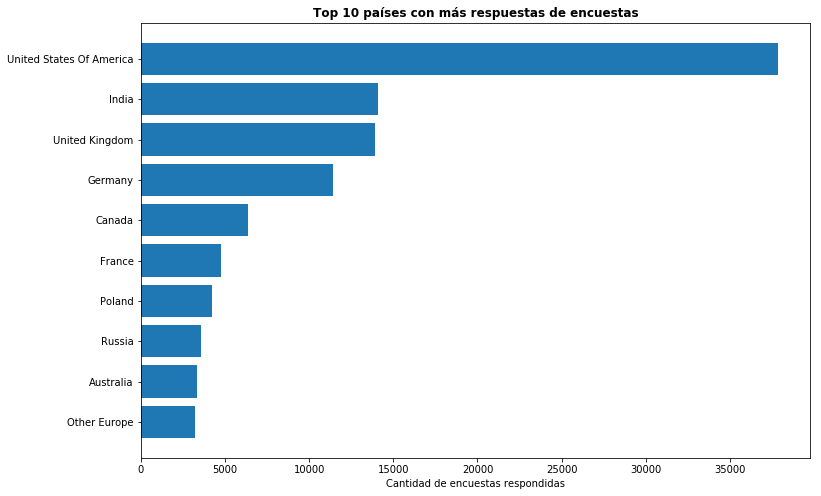

=== Executing: ===

consulta2 = []
# borrar consulta2 = [] cuando se tenga lista la pregunta
=== Output: ===
=== Executing: ===

consulta3 = []
# borrar consulta3 = [] cuando se tenga lista la pregunta
=== Output: ===
=== Executing: ===
consulta4 = (encuestas[encuestas['salary']!='Rather not say']
             .groupby(['salary','survey'])
             .count()['country']
            )

# crear contenedores de valores
valores = []
diccionario = {}

# iterador para consultar valores
for i in consulta4.unstack():
  valores.append(consulta4.unstack()[i].max()) 

# crear grafica
plt.figure(figsize = (13, 8)) # ajustar tamano
plt.bar(x = range(2011,2018), height = valores) # barras
plt.title('Rango salarial más común por año de encuesta', weight = 'bold'); # editar titulo

# crear iterador para agregar la marca del rango salarial
for i,x in enumerate(consulta4.unstack()):
  texto = list(consulta4.unstack()[x][consulta4.unstack()[x] == valores[i]].index)[0]
  plt.text(x = list(range(2011,201

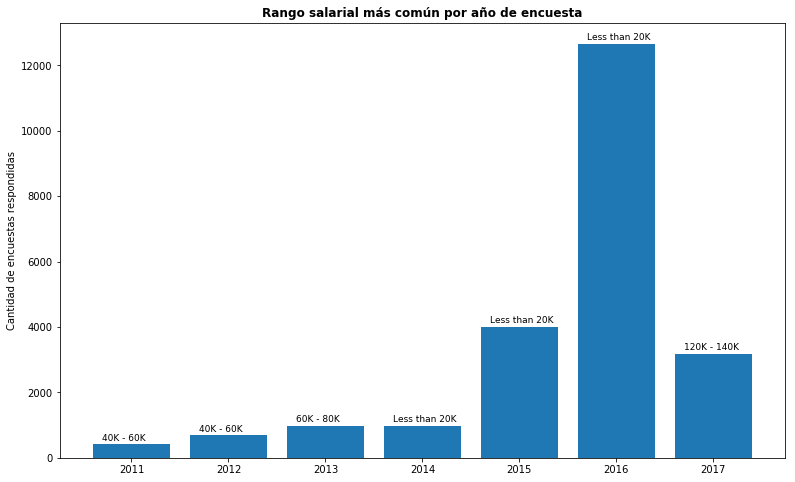

=== Executing: ===
consulta5 = (encuestas
             .groupby(['survey','occupation'])
             .count()['country']
             .unstack()
             .T
            )

# crear contenedor de graficas
fig, axs = plt.subplots(7,1, figsize = (8,7), sharex = True)

# crear graficas individuales
for i,survey in enumerate(consulta5):
  # establecer tamano de las barras y colores
  axs[i].barh(y = list(consulta5[survey].sort_values(ascending = False)[:3].index), 
              width = list(consulta5[survey].sort_values(ascending = False)[:3]),
              color = ['darkblue','blue','lightblue']
             )
  axs[i].set_yticklabels(list(consulta5[survey]
                              .sort_values(ascending = False)[:3]
                              .index), 
                         rotation = 'horizontal') # ajustar eje y
  
  axs[i].text(-30000, 1, survey, weight = 'bold') # ajustar fecha de la encuesta
  axs[i].text(-30000, 2.3, '-'*95, alpha = 0.2)  # ajustar linea separadora


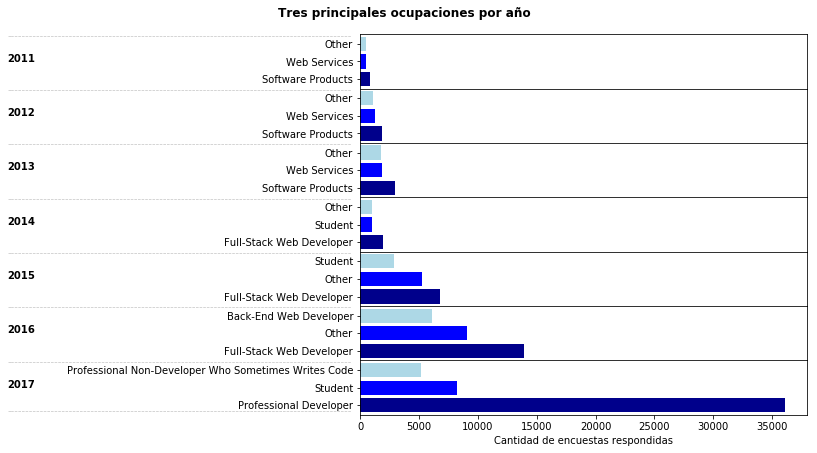

=== Executing: ===

consulta6 = []
# borrar consulta6 = [] cuando se tenga lista la pregunta
=== Output: ===
=== Executing: ===
consulta7 = (encuestas[encuestas['salary']!='Rather not say']
             .groupby(['salary','country'])
             .count()['occupation']
            )

# crear contenedores de valores
consulta7_axs = (consulta7
                 .unstack()[top_paises.index]
                 .max()
                 .sort_values(ascending = True)
                )

valores = list(consulta7_axs)
diccionario = {}

# crear grafica
plt.figure(figsize = (12, 10)) # ajustar tamano
plt.barh(y = consulta7_axs.index, width = valores) # barras
plt.title('Rango salarial más común por 10 países principales', weight = 'bold'); # editar titulo
plt.xlim(0,5300)
plt.xlabel('Cantidad de encuestas respondidas') # ajustar titulo eje x

# crear iterador para agregar la marca del rango salarial
for i,x in enumerate(consulta7.unstack()[top_paises.index]):
  
  texto = str(list(consulta7.unstack()

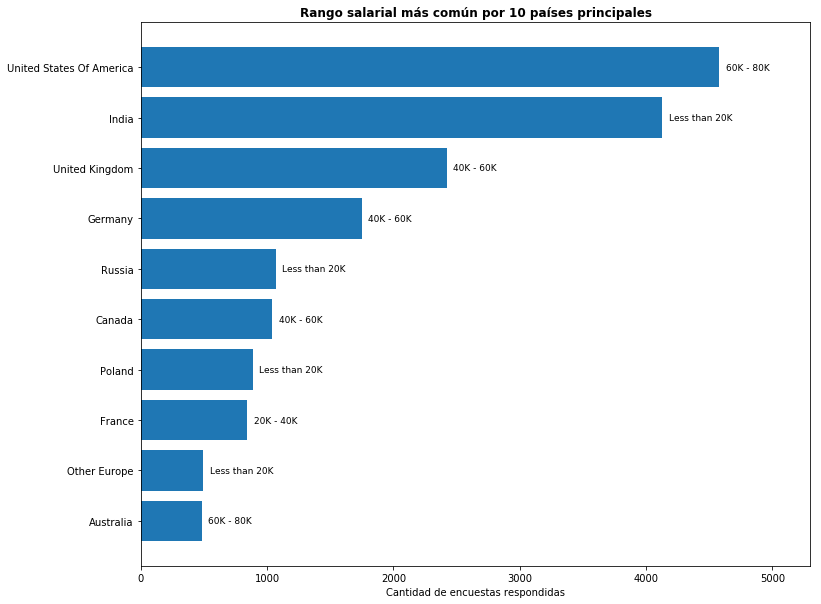

=== Executing: ===

consulta8 = []
# borrar consulta8 = [] cuando se tenga lista la pregunta
=== Output: ===
=== Executing: ===
consulta9 = encuestas[['country','programming_language']]

# filtrar por paises
consulta9 = consulta9[consulta9['country'].isin(list(top_paises.index))]

# crear nueva columna para contar lenguajes
consulta9['list_programming_language'] = consulta9['programming_language'].str.split(';')

# crear contenedores
lenguaje = []
valor = []

# realizar iterador sobre los paises
for i,x in enumerate(top_paises.index):
  
  # filtrar por cada pais
  lista = list(consulta9[consulta9['country'] == top_paises.index[i]]['list_programming_language'])
  
  # iterar sobre cada elemento y convertir en un dataframe
  lista2 = pd.DataFrame([list(chain(*lista)), '1'*len(list(chain(*lista)))]).T
  
  # filtrar otros lenguajes y contar
  lista3 = (lista2[lista2[0] != 'Other']
            .groupby(0)
            .count()
            .sort_values(by = 1, ascending = False)[:1]
       

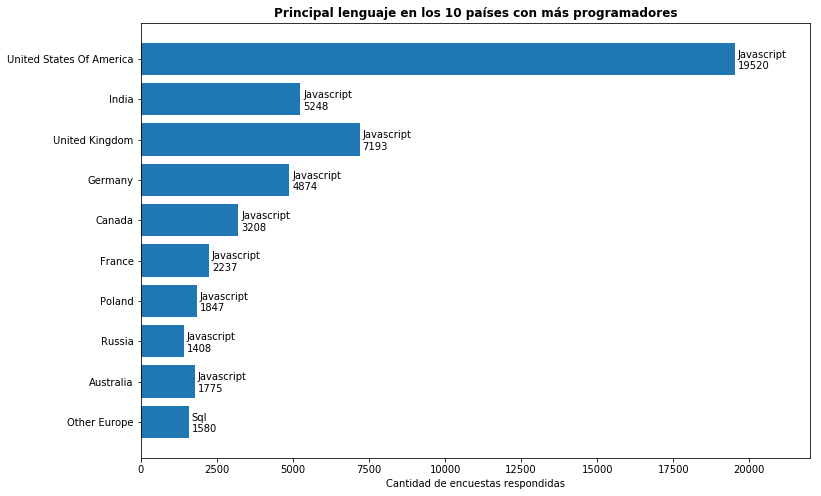

=== Executing: ===

consulta10 = []
# borrar consulta10 = [] cuando se tenga lista la pregunta
=== Output: ===
=== Executing: ===

consulta11 = (encuestas
              .groupby(['salary','occupation'])
              .count()['country']
              .unstack()
              .T[['120K - 140K', 'More than 140K']]
             )

# crear contenedor de graficas
fig, axs = plt.subplots(2,1, figsize = (5,5), sharex = True)


# crear graficas individuales
for i,salary in enumerate(consulta11):
  # establecer tamano de las barras y colores
  axs[i].barh(y = list(consulta11[salary].sort_values(ascending = False)[:3].index), 
              width = list(consulta11[salary].sort_values(ascending = False)[:3]),
              color = ['darkblue','blue','lightblue']
             )
  axs[i].set_yticklabels(list(consulta11[salary].sort_values(ascending = False)[:3].index), 
                         rotation = 'horizontal') # ajustar eje y
  axs[i].text(-2000, 2, salary, size = 11, weight = 'bold', rota

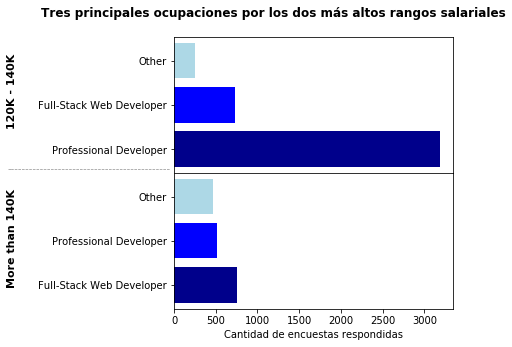

=== Executing: ===

consulta12 = []
# borrar consulta12 = [] cuando se tenga lista la pregunta
=== Output: ===
=== Executing: ===
consulta13 = encuestas.copy()

# crear columna que cuenta la cantidad de lenguajes
consulta13['number_languages'] = consulta13['programming_language'].str.count(';') + 1

# modificar los que no tienen lenguaje por cero
consulta13.loc[consulta13['programming_language'] == 'No language','number_languages'] = 0

# crear dataframe para el grafico
consulta13_axs = consulta13.groupby('survey').mean()['number_languages']

# crear figura
plt.figure(figsize = (12, 5)) # ajustar tamano
plt.bar(x = range(2011,2018), height = list(consulta13_axs)) # crear barras
plt.title('Número promedio de lenguajes o tecnologías dominadas por año', weight = 'bold') # ajustar titutlo
plt.xticks(range(2011,2018)); # ajustar eje x

# crear etiqueta de texto
for i,x in enumerate(consulta13):
  # crear texto redondeando el promedio
  texto = str(round(list(consulta13_axs)[i],2))
  # ajust

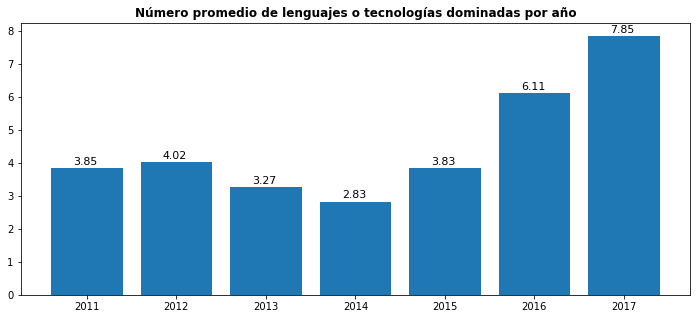

=== Executing: ===
prep14 = encuestas[(encuestas['country'] == 'Colombia') & (encuestas['salary'] != 'Rather not say')]

# crear dataframe
consulta14 = prep14.groupby(['salary','survey']).count()['occupation']

# crear contenedores
valores = []
diccionario = {}
anio = list(consulta14.unstack().columns)

# rellenar valores
for i in consulta14.unstack():
  valores.append(consulta14.unstack()[i].max())

# crear figura
plt.figure(figsize = (9, 7)) # ajustar tamano
plt.bar(x = anio, height = valores) # crear barras
plt.title('Rango salarial más común por año de encuesta en Colombia', weight = 'bold') # ajustar titutlo
plt.xticks(anio); # ajustar eje x
plt.ylabel('Cantidad de encuestas respondidas', rotation = 'vertical') # ajustar titulo eje y

# crear etiqueta de texto
for i,x in enumerate(consulta14.unstack()):
  texto = list(consulta14.unstack()[x][consulta14.unstack()[x] == valores[i]].index)[0]
  plt.text(x = anio[i] - 0.29,
           y = consulta14.unstack()[x].max() + 0.7, 
        

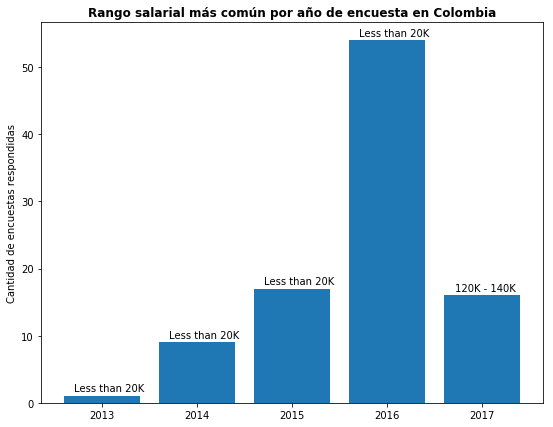

=== Executing: ===

consulta15 = []
# borrar consulta15 = [] cuando se tenga lista la pregunta
=== Output: ===
=== Executing: ===
consulta16 = encuestas[encuestas['country'] == 'Colombia'][['survey','programming_language']]

# crear nueva columna para contar lenguajes
consulta16['list_programming_language'] = consulta16['programming_language'].str.split(';')

# crear contenedores
anio = list(set(list(consulta16['survey'])))
anio.sort()
lenguaje = []
valor = []

# crear grafico contenedor
fig, axs = plt.subplots(len(anio), 1, figsize = (6,6), sharex = True)

# realizar iterador sobre las encuestas
for i,x in enumerate(anio):
  
  # filtrar por cada pais
  lista = list(consulta16[consulta16['survey'] == anio[i]]['list_programming_language'])
  
  # iterar sobre cada elemento y convertir en un dataframe
  lista2 = pd.DataFrame([list(chain(*lista)), '1'*len(list(chain(*lista)))]).T
  
  
  # filtrar otros lenguajes y contar
  lista3 = (lista2[lista2[0] != 'Other']
            .groupby(0)
 

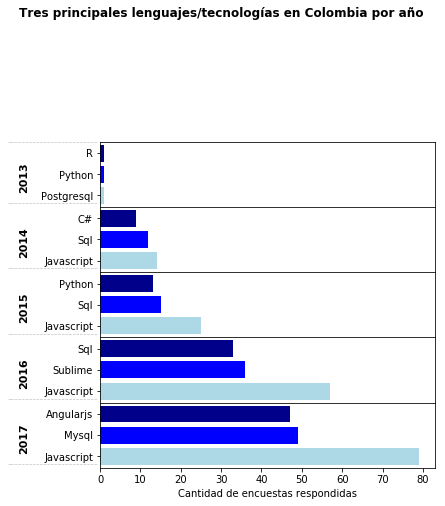

In [0]:
# ejecutar nuevamente todas las consultas
%rerun -g consulta0
%rerun -g consulta1.copy()
%rerun -g consulta2
%rerun -g consulta3
%rerun -g consulta4
%rerun -g consulta5
%rerun -g consulta6
%rerun -g consulta7
%rerun -g consulta8
%rerun -g consulta9
%rerun -g consulta10
%rerun -g consulta11
%rerun -g consulta12
%rerun -g consulta13
%rerun -g consulta14
%rerun -g consulta15
%rerun -g consulta16

### Modificación de la bodega de datos
---
Genere una  que modifique los datos operativos y la bodega de datos de manera coherente para corresponder con un nuevo indicador.

In [0]:
# se crea una funcion para cambiar listas

def cambiar_lista(lista, patron, reemplazo, cambios = None, entero = False, reg_expr = True):

  """cambiar_lista(lista, patron, reemplazo, cambios = None, entero = False, reg_expr = True)
  
  Esta función busca patron sobre la lista y cambia los elementos por reemplazo, 
  en los primeros n registros definidos por cambios. 
  
  lista     (list) lista sobre la que se quiere modificar información
  
  patron    (str)  patrón a buscar sobre la lista, puede ser una expresión regular si reg_expr es True
  
  reemplazo (str)  valor a reemplazar para todos los elementos encontrados con patron
  
  cambios   (int)  Por defecto None. cantidad de cambios a realizar, si es None, se realizan todos 
                   los cambios que sean posible
  
  entero    (bool) Por defecto False. se establece si la lista se devuelve como enteros
  
  reg_expr  (bool) Por defecto True. se establece si patron es una expersion regular o si se quiere buscar
                   explícitamente
  """
  
  # verificar el numero de cambios a realizar
  if cambios is None:
    cambios = len(lista)
  
  # definir contenedores
  i = 0
  cambios_realizados = 0
  
  # establecer ciclo de cambios
  while i <= cambios:
    
    # definir lista de cambios
    for j in range(i,len(lista)):
      
      # busqueda explicita de patron
      if lista[j] == patron:
        lista[j] = reemplazo
        i += 1
        cambios_realizados += 1 
        
      # busqueda por expresion regular
      elif reg_expr:
        patron, reemplazo = str(patron), str(reemplazo)
        elemento = lista[j]
        lista[j] = re.sub(patron,reemplazo,str(lista[j]))
        
        # verificar si cambio el elemento o no
        if lista[j] != str(elemento):
          i += 1
          cambios_realizados += 1
        else:
          lista[j] = elemento
          
      # parar el loop en caso de que ya se hayan realizado todos los cambios  
      if i == cambios:
        break
    i += 1
  next
  
  # convertir a entero si se solicita
  if entero:
    lista = [int(a) for a in lista]

  # retornar resultados  
  print('Total de cambios realizados: ' + str(cambios_realizados))
  if cambios == len(lista):
    print('Faltan por realizarse: ' + str(cambios - cambios_realizados))
 
  # retornar resultados
  return lista

In [0]:
# crear funcion para cambiar dataframe
def cambiar_dataframe(dataframe, columna, patron, reemplazo, dataframe_reemplazo = None, 
                      cambios = None, entero = False, reg_expr = True):
  
  """cambiar_dataframe(dataframe, columna, patron, reemplazo, dataframe_reemplazo = None, 
                       cambios = None, entero = False, reg_expr = True):
  
  Cambia todos los elementos de la columna columna de dataframe, utilizando la funcion cambiar_lista
  definida anteriormente (wrapper)
  
  dataframe             (dataframe) dataframe sobre el cual realizar el cambio
  
  columna               (str)       columna a la cual se quiere realizar el cambio
  
  patron                (str)       (cambiar_lista) patrón a buscar sobre la lista, puede ser una expresión regular si reg_expr es True
  
  reemplazo             (str)       (cambiar_lista) valor a reemplazar para todos los elementos encontrados con patron
  
  dataframe_reemplazo   (dataframe) dataframe objeto del reemplazo
  
  cambios               (int)       (cambiar_lista) Por defecto None. cantidad de cambios a realizar, si es None, se realizan todos 
                                    los cambios que sean posible
  
  entero                (bool)      (cambiar_lista) Por defecto False. se establece si la lista se devuelve como enteros
  
  reg_expr              (bool)      (cambiar_lista) Por defecto True. se establece si patron es una expersion regular o si se quiere buscar
                                    explícitamente
  """
  
  # verificar el destino del reemplazo
  if dataframe_reemplazo is None:
    dataframe_reemplazo = dataframe
    
  # seleccionar columna
  lista = dataframe[columna]
  
  # realizar los cambios en la lista
  lista2 = cambiar_lista(list(lista), patron, reemplazo, cambios, entero, reg_expr)
  
  # cambiar sobre el dataframe destino
  dataframe_reemplazo.loc[list(lista.index), columna] = lista2
  
  # retornar resultados
  return dataframe_reemplazo

In [34]:
# volver a abrir encuestas
encuestas = pd.read_csv('Archivos_SBDM_20191/encuestas_organizadas-v1-20110101-20171231.csv', 
                        sep = ',', 
                        encoding = 'utf8'
                       ).drop(columns = ['Unnamed: 0'])


encuestas.head()

,survey,country,years_programming,occupation,salary,programming_language
0,2011,Germany,Rather not say,Other,Rather not say,No language
1,2011,United States Of America,11 or more years,Web Services,Rather not say,No language
2,2011,Other Europe,2 to 5 years,Education,Rather not say,No language
3,2011,Australia,Less than 2 years,Other,Rather not say,No language
4,2011,United Kingdom,2 to 5 years,Software Products,Rather not say,No language


In [35]:
# EJEMPLO
# para las encuestas de colombia, cambiar para que el rango salarial mas alto
# en todos los anios sea 120K - 140K

encuestas2 = encuestas[encuestas['country'] == 'Colombia']
cambiar_dataframe(encuestas2,
                  'salary',                 
                  'Less than 20K', 
                  '120K - 140K',
                  dataframe_reemplazo = encuestas,
                  cambios = None
                 )
encuestas.head()

Total de cambios realizados: 80
Faltan por realizarse: 220


,survey,country,years_programming,occupation,salary,programming_language
0,2011,Germany,Rather not say,Other,Rather not say,No language
1,2011,United States Of America,11 or more years,Web Services,Rather not say,No language
2,2011,Other Europe,2 to 5 years,Education,Rather not say,No language
3,2011,Australia,Less than 2 years,Other,Rather not say,No language
4,2011,United Kingdom,2 to 5 years,Software Products,Rather not say,No language


In [0]:
# se recrean los nombres de las graficas para recalcular indicadores

nombres_graficas = []
for i in range(0,17):
  nombres_graficas.append('Archivos_SBDM_20191/query' + str(i) + '-v3.PNG')
  
#nombres_graficas

=== Executing: ===

consulta0 = encuestas.groupby('survey').count()['country']
plt.figure(figsize = (11,5))
plt.plot(list(consulta0));
plt.xticks(ticks = range(0, 7), labels = range(2011, 2018),)
plt.title('Cantidad de respuestas por año de encuesta', weight = 'bold', size = 12);

for i, x in enumerate(consulta0):
  plt.text(i - 0.2, x + 900, str(x))
  
# guardar grafica
plt.savefig(nombres_graficas[0], bbox_inches = Bbox([[0,0],[11,5]]))
=== Output: ===


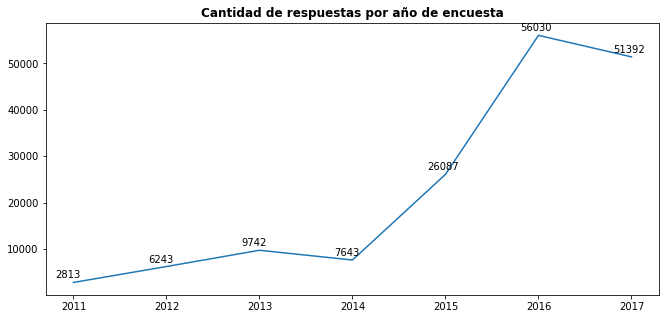

=== Executing: ===
consulta1 = (encuestas
             .groupby(['country',])
             .count()['occupation']
             .sort_values(ascending = False)[:10]
             .sort_values()
            )

#graficar
plt.figure(figsize = (12, 8)) # establecer tamano
plt.barh(y = consulta1.index, width = consulta1) # barras
plt.title('Top 10 países con más respuestas de encuestas', weight = 'bold'); # editar titulo
plt.xlabel('Cantidad de encuestas respondidas') # ajustar titulo eje x

top_paises = consulta1.copy()

# guardar grafica
plt.savefig(nombres_graficas[1], bbox_inches = Bbox([[-1,0],[12,8]]))
=== Output: ===


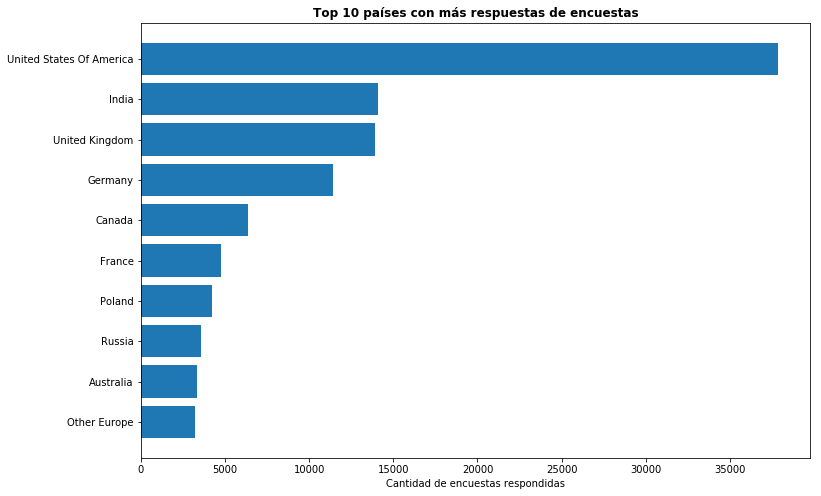

=== Executing: ===
consulta2 = []
ColumnadeLenguaje=list(encuestas['programming_language'])

#separacion de lenguajes
ListadeLenguajes = [re.split(';',x) for x in ColumnadeLenguaje]
ListadeCadaLenguaje = [j for i in ListadeLenguajes for j in i]

#calculo de la frecuencia
frecuencia = collections.Counter(ListadeCadaLenguaje).most_common(100)
frecuenciadf=pd.DataFrame.from_dict(frecuencia)
frecuenciadf=frecuenciadf.rename(columns = {0:'Language',1:'Programmers'})
frecuenciadf.sort_values('Programmers',ascending= False,inplace=True)

# filtro de lenguaje
filter = frecuenciadf['Language'].str.contains('^No language|^Other', na = False, regex = True)
frecuenciadf = frecuenciadf[~filter]
frecuenciadf = frecuenciadf.reset_index(drop=True)
print(frecuenciadf.head(len(frecuenciadf)))


#grafico de los 10 más usados
top_10_lenguajes = frecuenciadf[:11]

# crear grafica
plt.figure(figsize = (12, 10)) # ajustar tamano
plt.bar(x = top_10_lenguajes.Language, height = top_10_lenguajes.Programmers) # 

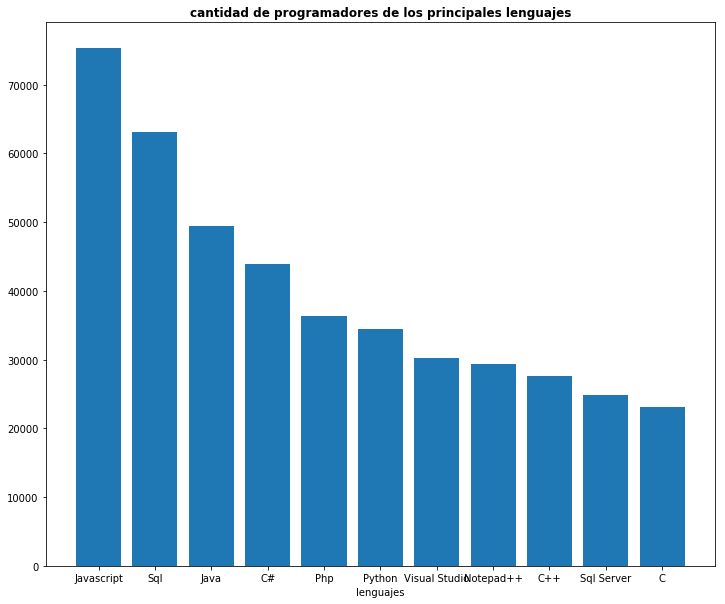

=== Executing: ===
consulta3 = encuestas[['survey','programming_language']].copy()

# crear nueva columna para contar lenguajes
consulta3['list_programming_language'] = consulta3['programming_language'].str.split(';')

# crear contenedores
anio = list(set(list(consulta3['survey'])))
anio.sort()
lenguaje = []
valor = []

# crear grafico contenedor
fig, axs = plt.subplots(len(anio), 1, figsize = (10,10), sharex = True)

for i,x in enumerate(anio):
    # filtrar por cada año
  lista = list(consulta3[consulta3['survey'] == anio[i]]['list_programming_language'])
  lista2 = pd.DataFrame([list(chain(*lista)), '1'*len(list(chain(*lista)))]).T
  
  
  lista3 = (lista2[lista2[0] != 'Other']
            .groupby(0)
            .count()
            .sort_values(by = 1, ascending = False)[:5]
           )
  axs[i].barh(y = list(lista3.index),
              width = list(lista3[1]),
              color = ['lightblue','blue','darkblue', 'darkgrey', 'grey']
             )
  axs[i].set_yticklabels(list(

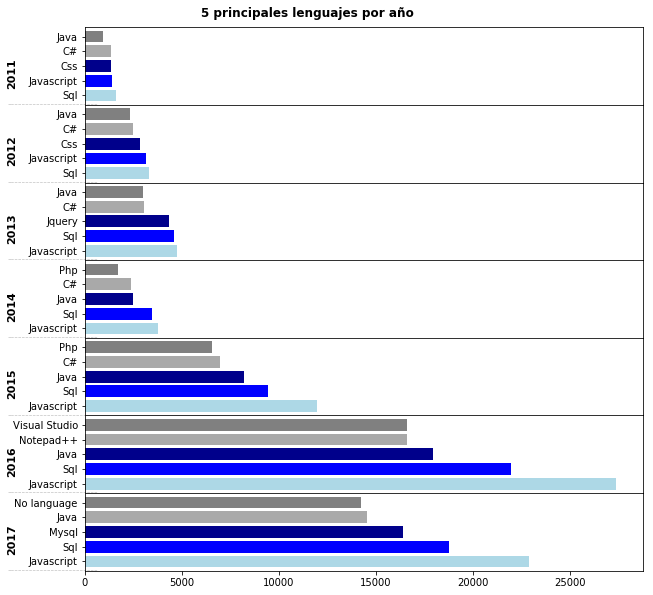

=== Executing: ===
consulta4 = (encuestas[encuestas['salary']!='Rather not say']
             .groupby(['salary','survey'])
             .count()['country']
            )

# crear contenedores de valores
valores = []
diccionario = {}

# iterador para consultar valores
for i in consulta4.unstack():
  valores.append(consulta4.unstack()[i].max()) 

# crear grafica
plt.figure(figsize = (13, 8)) # ajustar tamano
plt.bar(x = range(2011,2018), height = valores) # barras
plt.title('Rango salarial más común por año de encuesta', weight = 'bold'); # editar titulo

# crear iterador para agregar la marca del rango salarial
for i,x in enumerate(consulta4.unstack()):
  texto = list(consulta4.unstack()[x][consulta4.unstack()[x] == valores[i]].index)[0]
  plt.text(x = list(range(2011,2018))[i] - 0.3,
           y = consulta4.unstack()[x].max() + 120, 
           s = texto,
           ma =  'left',
           size = 9
          ) 
  diccionario.update({ str(list(range(2011,2018))[i]): 'valor: ' + str(v

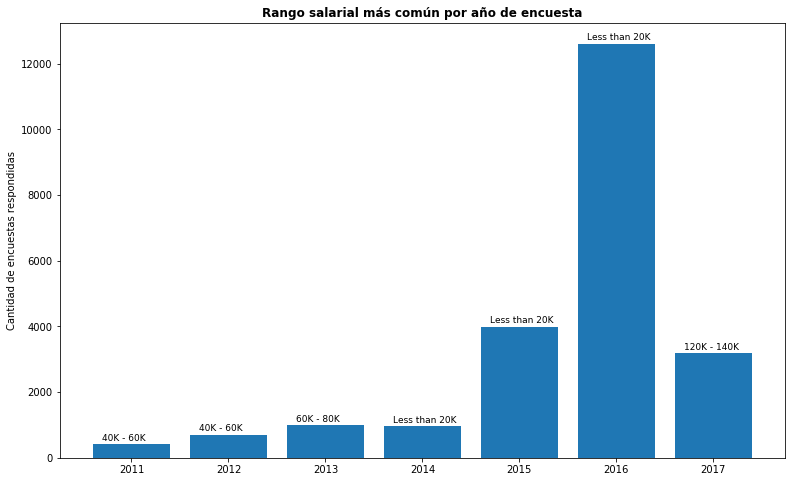

=== Executing: ===
consulta5 = (encuestas
             .groupby(['survey','occupation'])
             .count()['country']
             .unstack()
             .T
            )

# crear contenedor de graficas
fig, axs = plt.subplots(7,1, figsize = (8,7), sharex = True)

# crear graficas individuales
for i,survey in enumerate(consulta5):
  # establecer tamano de las barras y colores
  axs[i].barh(y = list(consulta5[survey].sort_values(ascending = False)[:3].index), 
              width = list(consulta5[survey].sort_values(ascending = False)[:3]),
              color = ['darkblue','blue','lightblue']
             )
  axs[i].set_yticklabels(list(consulta5[survey]
                              .sort_values(ascending = False)[:3]
                              .index), 
                         rotation = 'horizontal') # ajustar eje y
  
  axs[i].text(-30000, 1, survey, weight = 'bold') # ajustar fecha de la encuesta
  axs[i].text(-30000, 2.3, '-'*95, alpha = 0.2)  # ajustar linea separadora


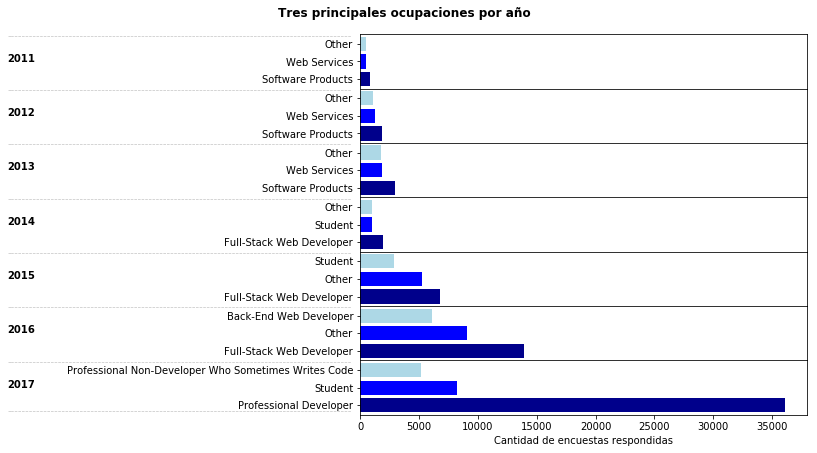

=== Executing: ===
encuestas6 = encuestas.copy()

# lista de los paises con más programadores
paisesConMas = list(encuestas6.groupby(['country'])['country'].count().sort_values(ascending=False).index)[:10]

#filtros para el grafico
baseSoloPaises = encuestas6[encuestas6['country'].isin(iter(paisesConMas))]
consulta6 = (baseSoloPaises.groupby(['country','occupation'])['occupation']
             .count()
             .sort_values(ascending=False)
             .unstack()
             .T
            )

# crear contenedor de graficas
fig, axs = plt.subplots(len(paisesConMas),1, figsize = (8,10), sharex = True)

# crear graficas individuales
for i,country in enumerate(consulta6):
  # establecer tamano de las barras y colores
  axs[i].barh(y = list(consulta6[country].sort_values(ascending = False)[:3].index), 
             width = list(consulta6[country].sort_values(ascending = False)[:3]),
             color = ['darkblue','blue','lightblue']
            )
  axs[i].set_yticklabels(list(consul

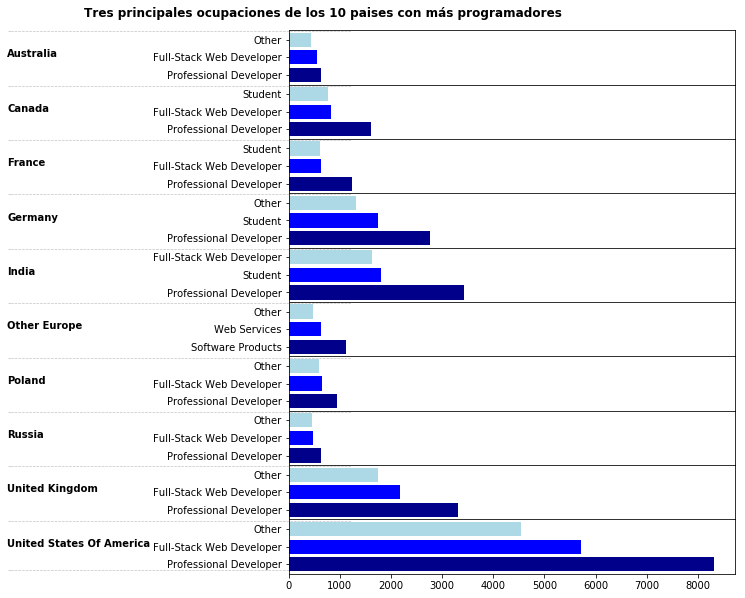

=== Executing: ===
consulta7 = (encuestas[encuestas['salary']!='Rather not say']
             .groupby(['salary','country'])
             .count()['occupation']
            )

# crear contenedores de valores
consulta7_axs = (consulta7
                 .unstack()[top_paises.index]
                 .max()
                 .sort_values(ascending = True)
                )

valores = list(consulta7_axs)
diccionario = {}

# crear grafica
plt.figure(figsize = (12, 10)) # ajustar tamano
plt.barh(y = consulta7_axs.index, width = valores) # barras
plt.title('Rango salarial más común por 10 países principales', weight = 'bold'); # editar titulo
plt.xlim(0,5300)
plt.xlabel('Cantidad de encuestas respondidas') # ajustar titulo eje x

# crear iterador para agregar la marca del rango salarial
for i,x in enumerate(consulta7.unstack()[top_paises.index]):
  
  texto = str(list(consulta7.unstack()[consulta7_axs.index[i]][consulta7.unstack()[consulta7_axs.index[i]] 
                                       

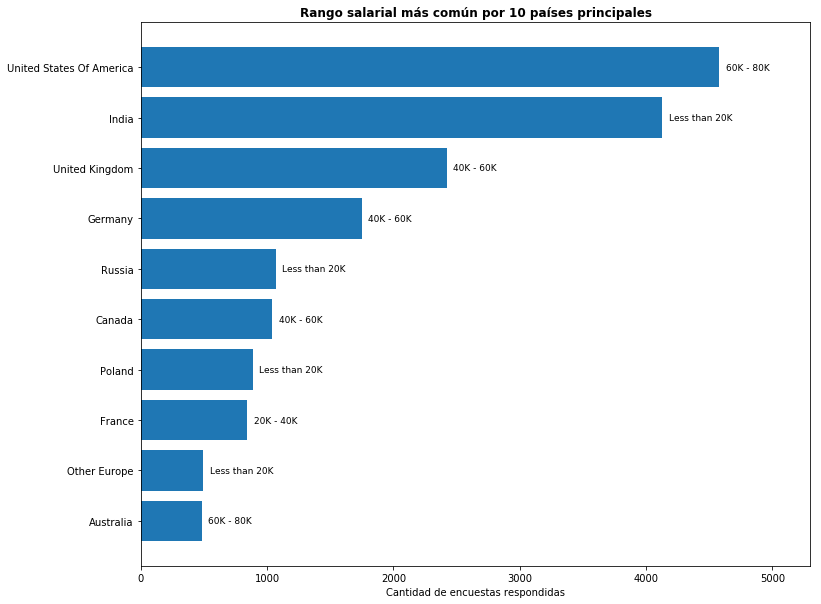

=== Executing: ===
consulta8 = encuestas[['survey','programming_language']].copy()
consulta8['list_programming_language'] = consulta8['programming_language'].str.split(';')

conteo_lenguajes_anio= pd.DataFrame()

anio = list(set(list(consulta8['survey'])))
  
for i,x in enumerate(anio):
  lista8 = list(consulta8[consulta8['survey'] == anio[i]]['list_programming_language'])
  lista8_1 = pd.DataFrame([list(chain(*lista8)),'1'*len(list(chain(*lista8)))]).T

  lista8_1['survey'] = str(anio[i])
  lista8_1=lista8_1.rename(columns={0: "programming_language",1:'quantity'})
  Series_lenguajes = (lista8_1
                      .groupby(['survey','programming_language'])
                      .count()['quantity']
                      .sort_values(ascending = False)
                      .reset_index()
                     )
  conteo_lenguajes_anio = pd.concat([conteo_lenguajes_anio,Series_lenguajes]).reset_index(drop=True)
  
 ## dataframe ordenado por lenguaje con año de menor a mayor
conteo_le

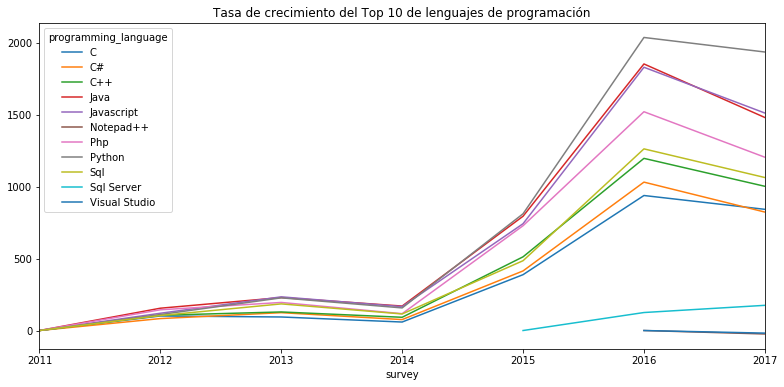

=== Executing: ===
consulta9 = encuestas[['country','programming_language']]

# filtrar por paises
consulta9 = consulta9[consulta9['country'].isin(list(top_paises.index))]

# crear nueva columna para contar lenguajes
consulta9['list_programming_language'] = consulta9['programming_language'].str.split(';')

# crear contenedores
lenguaje = []
valor = []

# realizar iterador sobre los paises
for i,x in enumerate(top_paises.index):
  
  # filtrar por cada pais
  lista = list(consulta9[consulta9['country'] == top_paises.index[i]]['list_programming_language'])
  
  # iterar sobre cada elemento y convertir en un dataframe
  lista2 = pd.DataFrame([list(chain(*lista)), '1'*len(list(chain(*lista)))]).T
  
  # filtrar otros lenguajes y contar
  lista3 = (lista2[lista2[0] != 'Other']
            .groupby(0)
            .count()
            .sort_values(by = 1, ascending = False)[:1]
           )
  
  # agregar valores a listas
  lenguaje.append(lista3.index[0])
  valor.append(list(lista3[1])[0])



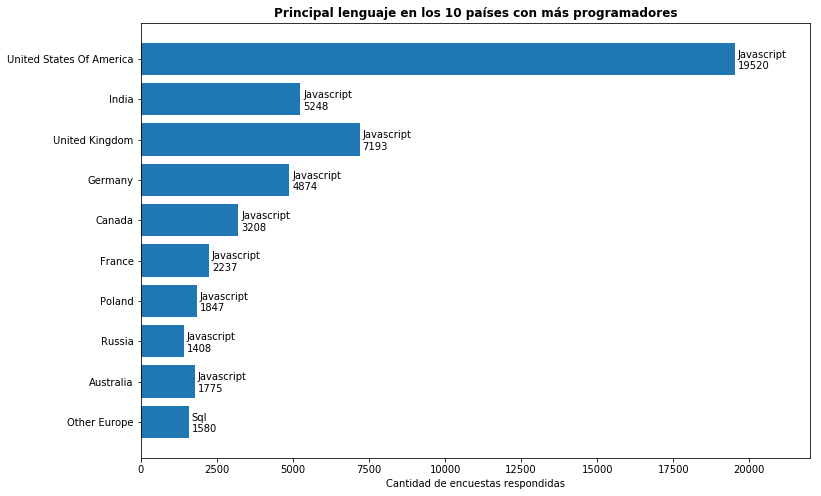

=== Executing: ===
encuesta_python = encuestas.copy()
filter = encuesta_python['programming_language'].str.contains('Python', na = False, regex = True)
encuestas_python_filtrada = encuesta_python[filter]
encuestas_python_filtrada

# crear tablas
consulta10 = encuestas_python_filtrada.groupby(['survey','occupation']).count()['country'].unstack().T

# crear contenedor de graficas
fig, axs = plt.subplots(7,1, figsize = (9,8), sharex = True)

# crear graficas individuales
for i,survey in enumerate(consulta10):
  
  # establecer tamano de las barras y colores
  axs[i].barh(y = list(consulta10[survey].sort_values(ascending = False)[:5].index), 
             width = list(consulta10[survey].sort_values(ascending = False)[:5]),
             color = ['darkblue','blue','lightblue','gray','lightgray']
            )
  axs[i].set_yticklabels(list(consulta10[survey].sort_values(ascending = False)[:5].index), 
                         rotation = 'horizontal') # ajustar eje y
  axs[i].text(-5000, 3, su

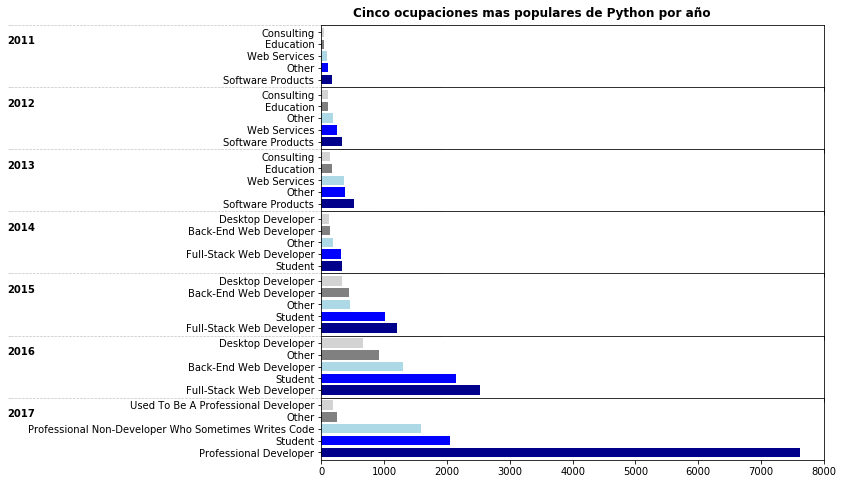

=== Executing: ===

consulta11 = (encuestas
              .groupby(['salary','occupation'])
              .count()['country']
              .unstack()
              .T[['120K - 140K', 'More than 140K']]
             )

# crear contenedor de graficas
fig, axs = plt.subplots(2,1, figsize = (5,5), sharex = True)


# crear graficas individuales
for i,salary in enumerate(consulta11):
  # establecer tamano de las barras y colores
  axs[i].barh(y = list(consulta11[salary].sort_values(ascending = False)[:3].index), 
              width = list(consulta11[salary].sort_values(ascending = False)[:3]),
              color = ['darkblue','blue','lightblue']
             )
  axs[i].set_yticklabels(list(consulta11[salary].sort_values(ascending = False)[:3].index), 
                         rotation = 'horizontal') # ajustar eje y
  axs[i].text(-2000, 2, salary, size = 11, weight = 'bold', rotation = 'vertical')
  axs[0].text(-2000, -0.5, '-'*45, alpha = 0.2)  # ajustar linea separadora
  
plt.subplots_

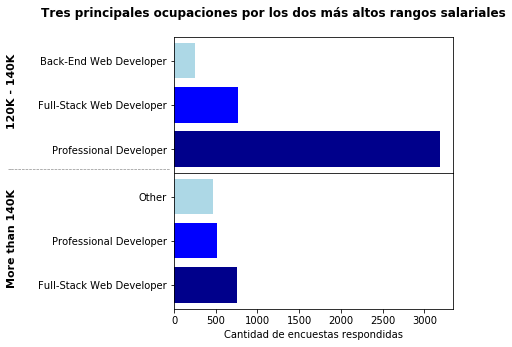

=== Executing: ===

consulta12 = []
# borrar consulta12 = [] cuando se tenga lista la pregunta
=== Output: ===
=== Executing: ===
consulta13 = encuestas.copy()

# crear columna que cuenta la cantidad de lenguajes
consulta13['number_languages'] = consulta13['programming_language'].str.count(';') + 1

# modificar los que no tienen lenguaje por cero
consulta13.loc[consulta13['programming_language'] == 'No language','number_languages'] = 0

# crear dataframe para el grafico
consulta13_axs = consulta13.groupby('survey').mean()['number_languages']

# crear figura
plt.figure(figsize = (12, 5)) # ajustar tamano
plt.bar(x = range(2011,2018), height = list(consulta13_axs)) # crear barras
plt.title('Número promedio de lenguajes o tecnologías dominadas por año', weight = 'bold') # ajustar titutlo
plt.xticks(range(2011,2018)); # ajustar eje x

# crear etiqueta de texto
for i,x in enumerate(consulta13_axs):
  # crear texto redondeando el promedio
  texto = str(round(list(consulta13_axs)[i],2))
  # a

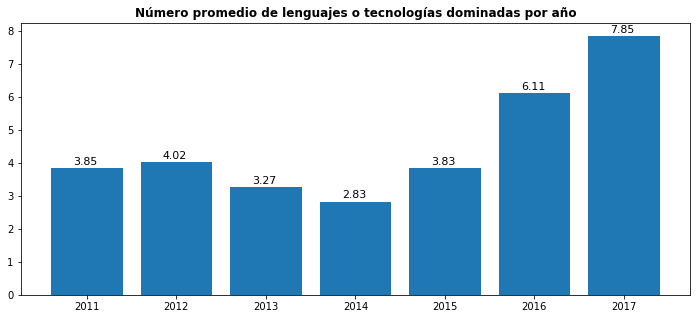

=== Executing: ===
prep14 = encuestas[(encuestas['country'] == 'Colombia') & (encuestas['salary'] != 'Rather not say')]

# crear dataframe
consulta14 = prep14.groupby(['salary','survey']).count()['occupation']

# crear contenedores
valores = []
diccionario = {}
anio = list(consulta14.unstack().columns)

# rellenar valores
for i in consulta14.unstack():
  valores.append(consulta14.unstack()[i].max())

# crear figura
plt.figure(figsize = (9, 7)) # ajustar tamano
plt.bar(x = anio, height = valores) # crear barras
plt.title('Rango salarial más común por año de encuesta en Colombia', weight = 'bold') # ajustar titutlo
plt.xticks(anio); # ajustar eje x
plt.ylabel('Cantidad de encuestas respondidas', rotation = 'vertical') # ajustar titulo eje y

# crear etiqueta de texto
for i,x in enumerate(consulta14.unstack()):
  texto = list(consulta14.unstack()[x][consulta14.unstack()[x] == valores[i]].index)[0]
  plt.text(x = anio[i] - 0.29,
           y = consulta14.unstack()[x].max() + 0.7, 
        

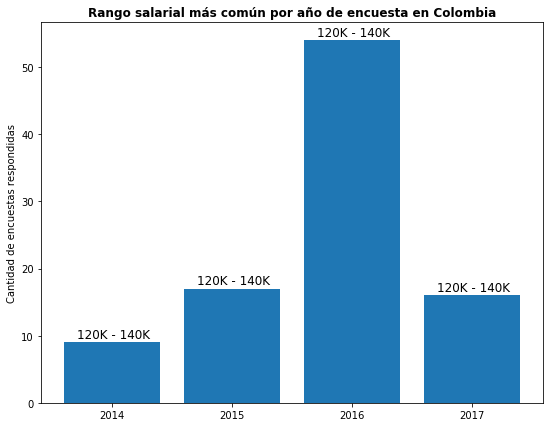

=== Executing: ===

tabla_previa = encuestas[(encuestas['country'] == 'Colombia')]

# crear dataframe
consulta15 = tabla_previa.groupby(['occupation','survey']).count()['salary']

# crear contenedores
valores15 = []
diccionario15 = {}
anio = list(consulta15.unstack().columns)

# rellenar valores
for i in consulta15.unstack():
  valores15.append(consulta15.unstack()[i].max()) 

# crear figura
plt.figure(figsize = (10, 10)) # ajustar tamano
plt.bar(x = anio, height = valores15) # crear barras
plt.title('Ocupación mas común por año de encuesta en Colombia', weight = 'bold') # ajustar titutlo
plt.xticks(anio); # ajustar eje x

# crear etiqueta de texto
for i,x in enumerate(consulta15.unstack()):
  texto = list(consulta15.unstack()[x][consulta15.unstack()[x] == valores15[i]].index)[0]
  plt.text(x = anio[i] - 0.5,
           y = consulta15.unstack()[x].max() + 0.5, 
           s = texto,
           ma =  'center'
          ) 
  # modificar diccionario
  diccionario15.update({ str(anio[i]): 

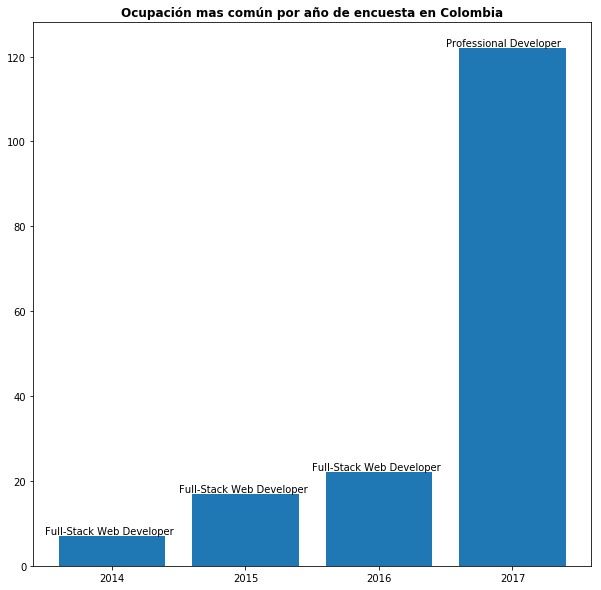

=== Executing: ===
consulta16 = encuestas[encuestas['country'] == 'Colombia'][['survey','programming_language']]

# crear nueva columna para contar lenguajes
consulta16['list_programming_language'] = consulta16['programming_language'].str.split(';')

# crear contenedores
anio = list(set(list(consulta16['survey'])))
anio.sort()
lenguaje = []
valor = []

# crear grafico contenedor
fig, axs = plt.subplots(len(anio), 1, figsize = (6,6), sharex = True)

# realizar iterador sobre las encuestas
for i,x in enumerate(anio):
  
  # filtrar por cada pais
  lista = list(consulta16[consulta16['survey'] == anio[i]]['list_programming_language'])
  
  # iterar sobre cada elemento y convertir en un dataframe
  lista2 = pd.DataFrame([list(chain(*lista)), '1'*len(list(chain(*lista)))]).T
  
  
  # filtrar otros lenguajes y contar
  lista3 = (lista2[lista2[0] != 'Other']
            .groupby(0)
            .count()
            .sort_values(by = 1, ascending = False)[:3]
           )
  
  axs[i].barh(y = l

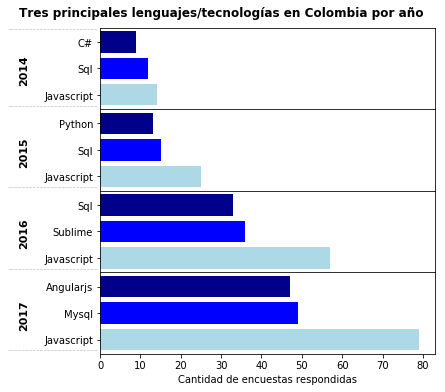

In [37]:
# ejecutar nuevamente todas las consultas
%rerun -g consulta0
%rerun -g consulta1.copy()
%rerun -g consulta2
%rerun -g consulta3
%rerun -g consulta4
%rerun -g consulta5
%rerun -g consulta6
%rerun -g consulta7
%rerun -g consulta8
%rerun -g consulta9
%rerun -g consulta10
%rerun -g consulta11
%rerun -g consulta12
%rerun -g consulta13
%rerun -g consulta14
%rerun -g consulta15
%rerun -g consulta16

## URL's de interés
---
Páginas web donde puede encontrar documentación sobre las funciones y procedimientos en este cuaderno.





**Pandas**

[Documentación del paquete *pandas* de *Python*](https://pandas.pydata.org/pandas-docs/stable/index.html)

[Cómo concatenar dataframes con *pandas*](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

[Cómo combinar diferentes columnas de texto con *pandas*](https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python)

[Cómo contar patrones de caracteres con *pandas*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.count.html)

[Cómo renombrar columnas con *pandas*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)

[Cómo convertir índices en columnas con *pandas*](https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column)

[Cómo anidar múltiples métodos con *pandas*](https://tomaugspurger.github.io/method-chaining.html)

[Cómo filtrar por múltiples elementos con *pandas*](https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe)

[Cómo cambiar datos de un dataframe con *pandas*](https://stackoverflow.com/questions/45093241/how-to-replace-part-of-dataframe-in-pandas)

[Cómo cambiar un dato específico de un dataframe con *pandas*](https://stackoverflow.com/questions/31569384/set-value-for-particular-cell-in-pandas-dataframe-with-iloc)

---
**Expresiones regulares *re***

[Documentación del paquete *re* de *Python*](https://docs.python.org/3/library/re.html)

[Cómo trabajar con expresiones regulares con *re*](https://www.guru99.com/python-regular-expressions-complete-tutorial.html)

---

**Graficar *matplotlib***

[Documentacion del paquete *matplotlib* de *Python*](https://matplotlib.org/3.1.0/index.html#)

[Cómo guardar una gráfica de *matplotlib* usando *savefig*](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.savefig.html)

---

***Markdown***

[Documentación sobre el formato *Markdown*](https://www.markdownguide.org/getting-started)

[Cómo crear tablas en formato Markdown](https://www.tablesgenerator.com/markdown_tables)

[Cómo aplicar formato de texto en *Markdown*](https://support.discordapp.com/hc/en-us/articles/210298617-Markdown-Text-101-Chat-Formatting-Bold-Italic-Underline-)

---

**Jupyter**

[Cómo añadir imágenes a un cuaderno de *Jupyter*](https://stackoverflow.com/questions/10628262/inserting-image-into-ipython-notebook-markdown)

[Cómo repetir comandos de *Jupyter* en otra celda](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-rerun)

[Cómo ingresar datos por usuario a cuaderno de *Jupyter*](https://stackoverflow.com/questions/34968112/how-to-give-jupyter-cell-standard-input-in-python)

---

**Varios**

[Ejemplo de trabajar con tipos de dato *None* o *Nonetype*](https://stackoverflow.com/questions/23086383/how-to-test-nonetype-in-python)

[Ejemplo de añadir elementos a un diccionario](https://thispointer.com/python-how-to-add-append-key-value-pairs-in-dictionary-using-dict-update/)

[Guía de estilo para código *Python*](https://www.python.org/dev/peps/pep-0008/)